#OBJECTIF

 L’entreprise Lapage  a ouvert depuis 2 ans un site de vente en ligne.
 L'objectif est de réaliser une étude des différents indicateurs de vente ainsi qu'une analyse du comportement client.


#PREPARATIONS DES DONNES

#1 -  IMPORTATION DES LIBRAIRIES ET CHARGEMENT DES FICHIERS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import scipy.stats as stats
import plotly.express as px
import plotly.io as pio


In [ ]:
# Installation de la bibliothèque pingouin
!pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7026 sha256=24b6ccf18403d084b3c5898fa9cdff7b291bba3c2e95607466b338e53f954cff
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customers_nn.csv to customers_nn.csv
Saving products_nn.csv to products_nn.csv
Saving transactions_nn.csv to transactions_nn.csv


# Créations des dataframes

In [ ]:
customers = pd.read_csv('customers_nn.csv', sep=",")
products = pd.read_csv('products_nn.csv', sep=",")
transactions = pd.read_csv('transactions_nn.csv', sep=",")

#2 - ANALYSE EXPLORATOIRE DES FICHIERS


## 2.1 Dataframe customers

###2.1.1 Aperçu du dataframe

In [ ]:
customers.head()

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [ ]:
# Création de la variable 'age' (plus facile à manipuler pour les analyses à venir)

customers['age']= 2023-customers['birth']
customers.head()

client_id sex  birth  age
0    c_4410   f   1967   56
1    c_7839   f   1975   48
2    c_1699   f   1984   39
3    c_5961   f   1962   61
4    c_5320   m   1943   80

### 2.1.2 Analyse du fichier

In [ ]:
# Information sur les données

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
 3   age        8623 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 269.6+ KB


Les types de valeurs correspondent aux données, il n'y a pas de valeur nulle.

In [ ]:
# Contenu du df

customers.describe(include = 'all')


client_id   sex        birth          age
count       8623  8623  8623.000000  8623.000000
unique      8623     2          NaN          NaN
top       c_4410     f          NaN          NaN
freq           1  4491          NaN          NaN
mean         NaN   NaN  1978.280877    44.719123
std          NaN   NaN    16.919535    16.919535
min          NaN   NaN  1929.000000    19.000000
25%          NaN   NaN  1966.000000    31.000000
50%          NaN   NaN  1979.000000    44.000000
75%          NaN   NaN  1992.000000    57.000000
max          NaN   NaN  2004.000000    94.000000



 - Il n'y a pas de doublons sur la clé client_id (count = unique)

 - Il n'y a pas de valeur nulle, les 4 colonnes ont 8623 valeurs

 - le client le plus jeune est né en 2004 (19 ans) et le plus vieux en 1929 (94 ans)

 - L'age moyen est de 44 ans

 - A peine plus de la moitié, 52% (4491/8623) sont des femmes.

In [ ]:
# Contenu de la variable sex

valeur_sex=customers['sex'].unique()
print(valeur_sex)

['f' 'm']


La variable 'sex' a seulement 2 valeurs : f ou m

In [ ]:
# Vérification de la syntaxe de la variable client_id (commence par 'c_' + chiffre(s))

customers[customers['client_id'].str.match(r'c_\d+')== False]

client_id sex  birth  age
2735      ct_0   f   2001   22
8494      ct_1   m   2001   22

2 client_id n'ont pas la bonne syntaxe.

On vérifie s'ils sont présents dans le df transactions :

In [ ]:
df1 = transactions[(transactions['client_id'] == 'ct_0') | (transactions['client_id'] == 'ct_1')]
df1.head()

id_prod                             date session_id client_id
3019      T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138      T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668      T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728     T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0

Il y a des lignes dans le fichier transactions avec les valeurs de syntaxe irrégulière de client_id. Les dates correspondantes commencent par 'test'. Ces lignes semblent être des lignes tests qu'il faudra sûrement supprimer.

##2.2 Dataframe products

###2.2.1 Aperçu du dataframe products

In [ ]:
products.head()

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

### 2.2.2 Analyse du fichier


In [ ]:
# Information sur le df

products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


Les types de valeurs correspondent aux données, il n'y a pas de valeur nulle.

In [ ]:
# Contenu du df

products.describe(include = 'all')


id_prod        price        categ
count     3287  3287.000000  3287.000000
unique    3287          NaN          NaN
top     0_1421          NaN          NaN
freq         1          NaN          NaN
mean       NaN    21.856641     0.370246
std        NaN    29.847908     0.615387
min        NaN    -1.000000     0.000000
25%        NaN     6.990000     0.000000
50%        NaN    13.060000     0.000000
75%        NaN    22.990000     1.000000
max        NaN   300.000000     2.000000



- Il n'y a pas de doublons sur la clé id_prod (count = unique = 3287

- Il n'y a pas de valeur nulle, 3287 valeurs pour les 3 colonnes

- Il semble y avoir 3 catégories : 0, 1 et 2

- Le prix le prix le plus élevé est de 300 Euros

- Il y a au moins un prix **inférieur** **0**




In [ ]:
# Recherche des prix négatifs

prix_neg = products.loc[products['price'] <= 0]
prix_neg.head()

id_prod  price  categ
731     T_0   -1.0      0

Un seul produit à un prix négatif, on constate de plus que la syntaxe du id_prod est incorrecte.

In [ ]:
# Vérification de la syntaxe de la variable id_prod (commence par 0, 1 ou 2 +  '_' + chiffre(s))

products[products['id_prod'].str.match(r'(0|1|2)_\d+')== False]

id_prod  price  categ
731     T_0   -1.0      0

Un seul produit à une syntaxe irrégulière : T_0 qui correspond, comme vu plus haut, au prix négatif.

On vérifie s'il est présent dans le df transactions :

In [ ]:
df2= transactions.loc[transactions['id_prod'] == 'T_0']
df2.head()

id_prod                             date session_id client_id
3019      T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
5138      T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0
9668      T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
10728     T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0
15292     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0

Il y a donc des lignes dans le fichier transactions qui correspondent aux valeurs ayant une syntaxe irrégulière de client_id et id_prod ainsi qu'un prix négatif.
Les dates correspondantes commencent par 'test'.

Ces lignes semblent être des lignes tests. On supprime ces références des df customers et products (elles seront à supprimer dans transactions au moment de l'analyse de ce fichier).

In [ ]:
# Supprimer la ligne index =731 (T_0) du df products
products = products.drop([731])

# Réinitialiser les index
products = products.reset_index(drop=True)

In [ ]:
products.shape[0]

3286

In [ ]:
# Supprimer les lignes index =2735 et 8494 (ct_0et ct_1) du df customers
customers = customers.drop([2735,8494])

# Réinitialiser les index
customers = customers.reset_index(drop=True)

In [ ]:
customers.shape[0]

8621

In [ ]:
# Vérification de la correspondance entre la première valeur de l'id-prod et la catégorie du produit

# Extraction de la première valeur de l'id_prod dans une nouvelle variable : categ_id

new = products["id_prod"].str.split("_", n = 1, expand = True)
products["categ_id"]= new[0]

products.head()


id_prod  price  categ categ_id
0  0_1421  19.99      0        0
1  0_1368   5.13      0        0
2   0_731  17.99      0        0
3   1_587   4.99      1        1
4  0_1507   3.99      0        0

In [ ]:
# Vérification du type de la variable categ_id

products.dtypes

id_prod      object
price       float64
categ         int64
categ_id     object
dtype: object

Le type object ne correspond aux valeurs de categ_id, il faut le convertir en entier

In [ ]:
# Conversion de categ_id en  entier (int64') ()

products['categ_id'] = products['categ_id'].astype('int64')

In [ ]:
# Comparaison des 2 variables categ et categ_id

comparaison = products['categ'] == products['categ_id']
comparaison.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [ ]:
different=comparaison.loc[comparaison == False]
len(different)

0

Toutes les valeurs de id_prod commence bien par la bonne reférence de catégorie.

In [ ]:
# Suppression de la variable categ_id

del products['categ_id']

med:
 0    4.99
Name: price, dtype: float64


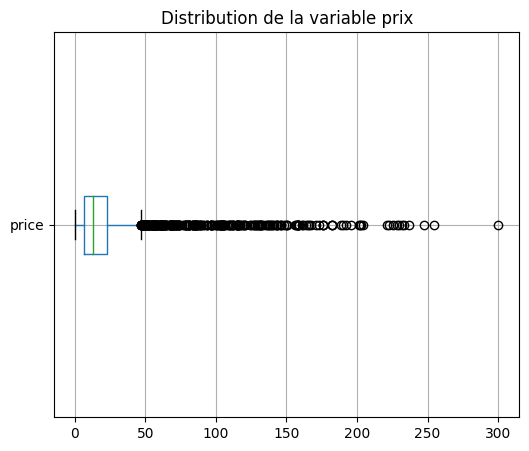

In [ ]:
# Distribution des valeurs de la variable 'price'

print("med:\n",products['price'].mode())

plt.figure(figsize=(6,5))
plt.title('Distribution de la variable prix')
products.boxplot(column="price", vert = False)

plt.show()

Il n'y a plus de valeur négative.

Soit l'équart interquartile (IQ = Q3-Q1) IQ = 16 (22.99-6.99) (cf erp.describe plus haut), les valeurs supérieures à (Q3+1.5IQ), soit 46.96 (22.99+(1.5*16)) sont considérées comme des outliers ou valeurs atypiques.

Ces valeurs ne sont cependant pas abérentes. On va regarder la répartion des prix en fonction des catégories de produit.



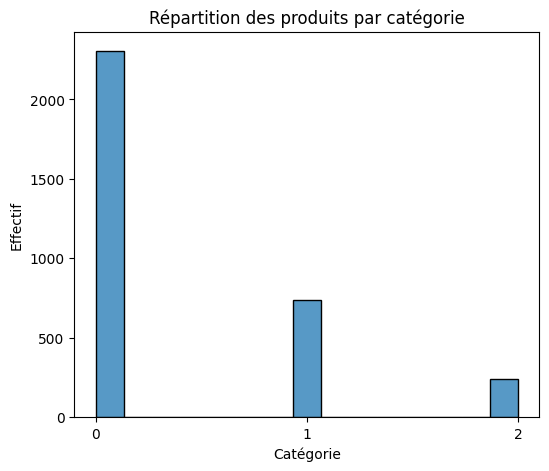

In [ ]:
# Répartition des produits par catégorie

plt.figure(figsize=(6,5))
plt.title('Répartition des produits par catégorie')
sns.histplot(data=products, x='categ')
plt.xticks([0, 1, 2])
plt.xlabel("Catégorie")
plt.ylabel("Effectif")
plt.show()

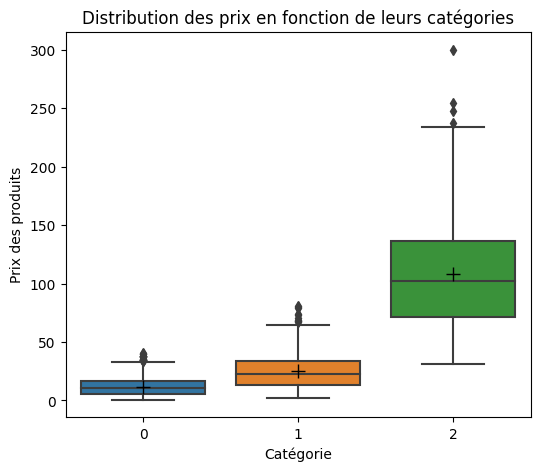

In [ ]:
# Distribution des prix par catérorie

plt.figure(figsize=(6,5))
plt.title('Distribution des prix en fonction de leurs catégories')
ax = sns.boxplot(data=products, x='categ', y='price',showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "10"})

plt.xticks([0, 1, 2])
plt.xlabel("Catégorie")
plt.ylabel("Prix des produits")
plt.show()


Les prix semblent corrélés avec la catégorie.

On trouve les prix considérés atypiques (>47) dans les valeurs les plus élevées  de la catégorie 1 mais ils constituent très largement la categorie 2.

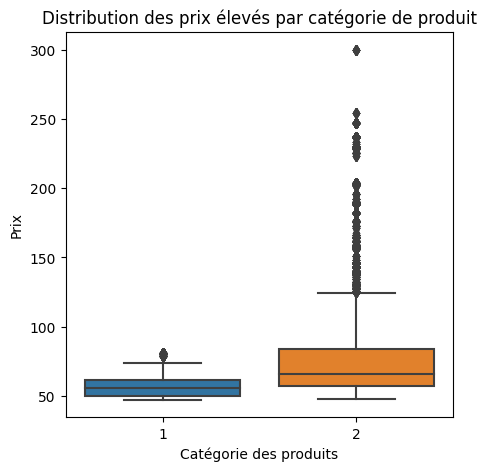

In [ ]:
# Distribution des prix élevés

Prix_atypiques_vente = PCT.loc[PCT['price'] > 47]

plt.figure(figsize=(5,5))
plt.title('Distribution des prix élevés par catégorie de produit')
sns.boxplot(data=Prix_atypiques_vente, x='categ', y='price')
plt.xlabel("Catégorie des produits")
plt.ylabel("Prix")
plt.show()

In [ ]:
# Pourcentage des vente de catégorie 1 avec des prix élevés
pourcentage_cat1 = round(((Prix_atypiques_vente.loc[Prix_atypiques_vente['categ']== 1].shape[0])/(PCT.loc[PCT['categ']== 1].shape[0]))*100,2)
print(pourcentage_cat1,'%')

1.16 %


In [ ]:
# Pourcentage des vente de catégorie 2 avec des prix élevés

pourcentage_cat1 = round(((Prix_atypiques_vente.loc[Prix_atypiques_vente['categ']== 2].shape[0])/(PCT.loc[PCT['categ']== 2].shape[0]))*100,2)
print(pourcentage_cat1,'%')

89.25 %


Des ventes ont bien été réalisées sur cette gamme de prix élevés. Ces prix élevés représentent seulement 1.16 % de la catégorie 1 mais près de 90 % de la catégorie 2.

##2.3 Dataframe transactions

###2.3.1 Aperçu du dataframe

In [ ]:
transactions.head()

id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

### 2.3.2 Analyse du fichier

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


Il n'y a pas de valeur nulle.

La date est en type object, il faut la convertir en format date

Quand on applique la fonction pd.to_datetime pour convertir le type, on a une erreur de format. Au moins une valeur est abérrante et contient un string (test_2021-03-01 02:30:02.237419). On va chercher si cette erreur, ou une autre erreur de format, s'est reproduit plusieurs fois.

In [ ]:
# On convertie les dates dans une nouvelle variable 'date_convertie' en forçant la conversion avec errors ='coerce'

transactions['date_convertie'] = pd.to_datetime(transactions['date'], errors='coerce')

# affichage des lignes qui n'ont pas pu être convertie en date et ont donc reçu 'NaT' pour valeur

pb_conversion = transactions[transactions['date_convertie'].isna()]
pb_conversion.head()

id_prod                             date session_id client_id  \
3019      T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0   
5138      T_0  test_2021-03-01 02:30:02.237425        s_0      ct_0   
9668      T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1   
10728     T_0  test_2021-03-01 02:30:02.237436        s_0      ct_0   
15292     T_0  test_2021-03-01 02:30:02.237430        s_0      ct_0   

      date_convertie  
3019             NaT  
5138             NaT  
9668             NaT  
10728            NaT  
15292            NaT

In [ ]:
pb_conversion.shape[0]

200

On trouve 200 lignes avec un problème de format date (=NaT) dont toutes les lignes tests déjà identifiées dans les autres df comme lignes de test. Il faut les supprimer :


In [ ]:
# suppression des lignes id_prod = 'T_0'

transactions = transactions[transactions['id_prod']!= 'T_0']
transactions = transactions.reset_index(drop=True)

In [ ]:
transactions.shape[0]

679332

In [ ]:
# On renouvelle l'opération pour vérfier si d'autres erreurs de format étaient présentes et auraient reçu 'NaT' pour valeur

pb_conversion2 = transactions[transactions['date_convertie'].isna()]
pb_conversion2.head()

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, date_convertie]
Index: []

Il n'y a pas d'autres erreurs, on peut convertir la date au bon format et  supprimer la variable 'date_convertie'.

In [ ]:
# Suppression de la colonne 'date_convertie' et convertion  de la variable date en format date

del transactions['date_convertie']
transactions[('date')]=pd.to_datetime(transactions['date'])
transactions.head()

id_prod                       date session_id client_id
0  0_1518 2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251 2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209 2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232

In [ ]:
# Création de la variable mois (annee_mois) (pour les analyses ultèrieures)

transactions['mois'] = transactions['date'].dt.strftime('%Y-%m')
transactions.head()

id_prod                       date session_id client_id     mois
0  0_1518 2022-05-20 13:21:29.043970   s_211425     c_103  2022-05
1   1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  2022-02
2  0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714  2022-06
3   2_209 2021-06-24 04:19:29.835891    s_52962    c_6941  2021-06
4  0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232  2023-01

In [ ]:
# Création de la variable année (pour les analyses ultèrieures)

transactions['année'] = transactions['date'].dt.strftime('%Y')
transactions.head()

id_prod                       date session_id client_id     mois année
0  0_1518 2022-05-20 13:21:29.043970   s_211425     c_103  2022-05  2022
1   1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  2022-02  2022
2  0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714  2022-06  2022
3   2_209 2021-06-24 04:19:29.835891    s_52962    c_6941  2021-06  2021
4  0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232  2023-01  2023

In [ ]:
# Contenu du df après correction des formats date

transactions.describe()

<ipython-input-43-e9fa4f1387b6>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions.describe()


id_prod                        date session_id client_id     mois  \
count   679332                      679332     679332    679332   679332   
unique    3266                      679332     342315      8600       24   
top      1_369  2022-05-20 13:21:29.043970   s_118668    c_1609  2021-09   
freq      2252                           1         14     25488    33326   
first      NaN  2021-03-01 00:01:07.843138        NaN       NaN      NaN   
last       NaN  2023-02-28 23:58:30.792755        NaN       NaN      NaN   

         année  
count   679332  
unique       3  
top       2022  
freq    346500  
first      NaN  
last       NaN

Les données couvrent la période du 01-03-2021 au 28-02-2023

In [ ]:
# Vérification de la syntaxe de la variable session_id (commence par 's_' + chiffre(s))

transactions[transactions['session_id'].str.match(r's_\d+')== True]


id_prod                       date session_id client_id     mois année
0       0_1518 2022-05-20 13:21:29.043970   s_211425     c_103  2022-05  2022
1        1_251 2022-02-02 07:55:19.149409   s_158752    c_8534  2022-02  2022
2       0_1277 2022-06-18 15:44:33.155329   s_225667    c_6714  2022-06  2022
3        2_209 2021-06-24 04:19:29.835891    s_52962    c_6941  2021-06  2021
4       0_1509 2023-01-11 08:22:08.194479   s_325227    c_4232  2023-01  2023
...        ...                        ...        ...       ...      ...   ...
679327  0_1551 2022-01-15 13:05:06.246925   s_150195    c_8489  2022-01  2022
679328   1_639 2022-03-19 16:03:23.429229   s_181434    c_4370  2022-03  2022
679329  0_1425 2022-12-20 04:33:37.584749   s_314704     c_304  2022-12  2022
679330  0_1994 2021-07-16 20:36:35.350579    s_63204    c_2227  2021-07  2021
679331   1_523 2022-09-28 01:12:01.973763   s_274568    c_3873  2022-09  2022

[679332 rows x 6 columns]

On a 679332 lignes, toutes les valeurs de session_id sont bien contruites sous le format 's_' + chiffre(s)


In [ ]:
# Recherche de doublons sur la clé 'session_id + date'

transactions_doublon=transactions[transactions[['session_id','date']].duplicated(keep=False)]
print("Le tableau comporte {} ligne(s) en double".format(transactions_doublon.shape[0]))

Le tableau comporte 0 ligne(s) en double


## 2.4 Analyse complementaire :  recherche des clients inactifs et des produits non vendus


### 2.4.1 Recherche des clients inactifs

In [ ]:
# Recherche des clients présents dans cusmoters mais absent dans transactions

set_client_transa = set(transactions['client_id'])

set_client_custom = set(customers['client_id'])

set_clients_inactifs = set_client_custom - set_client_transa

clients_inactifs = customers[customers['client_id'].isin(set_clients_inactifs)]
clients_inactifs.head()


client_id sex  birth  age
801     c_8253   f   2001   22
2483    c_3789   f   1997   26
2734    c_4406   f   1998   25
2768    c_2706   f   1967   56
2850    c_3443   m   1959   64

In [ ]:
print("Il y a {} clients inactifs".format(clients_inactifs.shape[0]))

Il y a 21 clients inactifs


In [ ]:
pourcentage_inactif = round(((clients_inactifs.shape[0]) / customers['client_id'].count())*100,2)
print( "{} % des clients du fichiers customers sont inactifs".format(pourcentage_inactif))

0.24 % des clients du fichiers customers sont inactifs


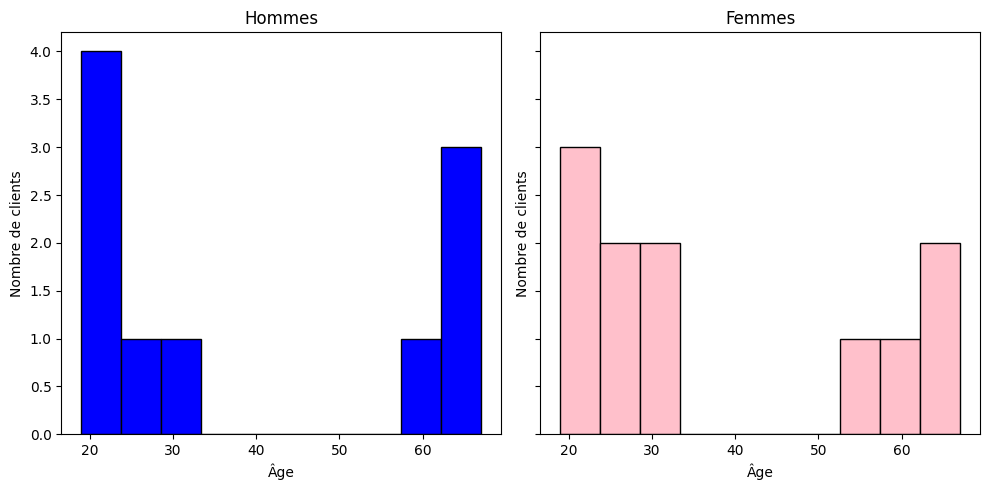

In [ ]:
# Profil des clients inactifs

# Création des subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True, tight_layout=True)

# Filtrer les données pour les hommes et les femmes
df_homme = clients_inactifs[clients_inactifs['sex'] == 'm']
df_femme = clients_inactifs[clients_inactifs['sex'] == 'f']

# Plot pour les hommes
ax1.hist(df_homme['age'], bins=10, color='blue', edgecolor='black')
ax1.set_title('Hommes')
ax1.set_xlabel('Âge')
ax1.set_ylabel('Nombre de clients')

# Plot pour les femmes
ax2.hist(df_femme['age'], bins=10, color='pink', edgecolor='black')
ax2.set_title('Femmes')
ax2.set_xlabel('Âge')
ax2.set_ylabel('Nombre de clients')

plt.show()

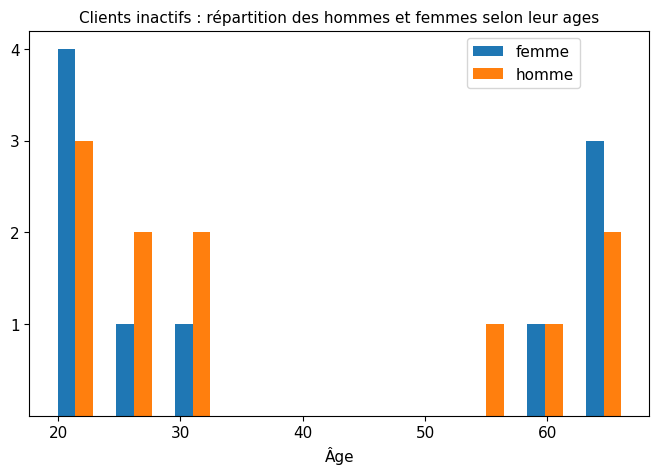

In [ ]:
df_homme = clients_inactifs[clients_inactifs['sex'] == 'm']
df_femme = clients_inactifs[clients_inactifs['sex'] == 'f']

# Largeur des barres
bar_width = 0.6

B = ['femme', 'homme']

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Clients inactifs : répartition des hommes et femmes selon leur ages", fontsize=11)

# Tracer l'histogramme pour les hommes et les femmes
ax.hist([df_homme['age'], df_femme['age']], histtype='bar',
        align='mid', label=B, rwidth=bar_width)


# les axes
ax.set_xlabel('Âge', fontsize=11)
plt.yticks([1,2,3,4]) #seulement les valeurs 1 2 3 4)
ax.tick_params(labelsize=11) # taille de la police des valeurs des axes

# légende
ax.legend(loc='upper right', fontsize=11, bbox_to_anchor=(0.9, 1))
plt.show()

Il ya très peu de clients inactifs dans le fichiers customers (0.24%). Aucun profil type ne se dégage.

### 2.4.2 Recherche des produits invendus

In [ ]:
# Recherche des produit présents dans products mais absent dans transactions

set_produit_prod = set(products['id_prod'])
set_produit_transa = set(transactions['id_prod'])
set_produits_inactifs = set_produit_prod - set_produit_transa
produits_inactifs = products[products['id_prod'].isin(set_produits_inactifs)]
produits_inactifs.head()



id_prod  price  categ
184  0_1016  35.06      0
279  0_1780   1.67      0
736  0_1062  20.08      0
793  0_1119   2.99      0
810  0_1014   1.15      0

In [ ]:
print("Il y a {} produits jamais vendus dans la période du 01-03-2021 au 28-02-2023".format(produits_inactifs.shape[0]))

Il y a 21 produits jamais vendus dans la période du 01-03-2021 au 28-02-2023


Text(0, 0.5, 'Effectif')

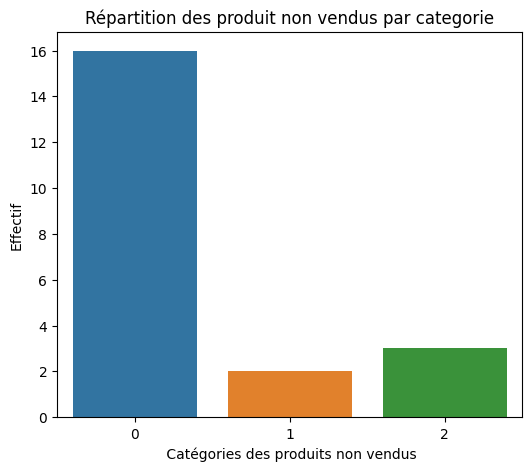

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Répartition des produit non vendus par categorie')
sns.countplot(data=produits_inactifs, x='categ')
plt.xlabel(" Catégories des produits non vendus")
plt.ylabel("Effectif")

In [ ]:
pourcentage_produits_inactifs = round(((produits_inactifs.shape[0])/(products['id_prod'].count()))*100,2)
print( "{} % des produits du fichier products ne sont jamais vendus dans la période du 01-03-2021 au 28-02-2023".format(pourcentage_produits_inactifs))

0.64 % des produits du fichier products ne sont jamais vendus dans la période du 01-03-2021 au 28-02-2023


Très peu de références invendues. La décision de retirer ces références du catalogues pourrait cependant entre envisagée.

#3. ANALYSES DES DONNEES

## 3.1 Jointures des dataframes

In [ ]:
# jointure customers-transactions : CT (Jointure à droite car ce qui m'importe est de conserver toutes les lignes de transactions pour les calculs de CA.)

CT=pd.merge(customers,transactions,how='right',on=['client_id'])
CT.head()

client_id sex  birth  age id_prod                       date session_id  \
0     c_103   f   1986   37  0_1518 2022-05-20 13:21:29.043970   s_211425   
1    c_8534   m   1988   35   1_251 2022-02-02 07:55:19.149409   s_158752   
2    c_6714   f   1968   55  0_1277 2022-06-18 15:44:33.155329   s_225667   
3    c_6941   m   2000   23   2_209 2021-06-24 04:19:29.835891    s_52962   
4    c_4232   m   1980   43  0_1509 2023-01-11 08:22:08.194479   s_325227   

      mois année  
0  2022-05  2022  
1  2022-02  2022  
2  2022-06  2022  
3  2021-06  2021  
4  2023-01  2023

In [ ]:
CT.shape[0]

679332

In [ ]:
CT.isnull().sum()

client_id     0
sex           0
birth         0
age           0
id_prod       0
date          0
session_id    0
mois          0
année         0
dtype: int64

In [ ]:
# Jointure products-CT (Jointure à droite car ce qui m'importe c'est de conserver toutes les lignes de transactions pour les calculs de CA.)

PCT=pd.merge(products,CT, how='right',on=['id_prod'])
PCT.head()

id_prod  price  categ client_id sex  birth  age                       date  \
0  0_1518   4.18    0.0     c_103   f   1986   37 2022-05-20 13:21:29.043970   
1   1_251  15.99    1.0    c_8534   m   1988   35 2022-02-02 07:55:19.149409   
2  0_1277   7.99    0.0    c_6714   f   1968   55 2022-06-18 15:44:33.155329   
3   2_209  69.99    2.0    c_6941   m   2000   23 2021-06-24 04:19:29.835891   
4  0_1509   4.99    0.0    c_4232   m   1980   43 2023-01-11 08:22:08.194479   

  session_id     mois année  
0   s_211425  2022-05  2022  
1   s_158752  2022-02  2022  
2   s_225667  2022-06  2022  
3    s_52962  2021-06  2021  
4   s_325227  2023-01  2023

In [ ]:
# Vérification taille et valeurs nulles

PCT.shape[0]

679332

OK, même nb de lignes que le DF transactions

In [ ]:
PCT.isnull().sum()

id_prod         0
price         221
categ         221
client_id       0
sex             0
birth           0
age             0
date            0
session_id      0
mois            0
année           0
dtype: int64

221 valeurs nulles pour les variables price et categ. Cela signifie que certains id_prod présents dans le df transactions ne sont pas dans le df products.


In [ ]:
# Identification des produits sans correspondance

set_produit_prod = set(products['id_prod'])
set_produit_transa = set(transactions['id_prod'])
set_sans_correspondance_transa =  set_produit_transa - set_produit_prod
sans_correspondance_transa  = PCT[PCT['id_prod'].isin(set_sans_correspondance_transa)]
sans_correspondance_transa.head()

id_prod  price  categ client_id sex  birth  age  \
2633   0_2245    NaN    NaN    c_4746   m   1940   83   
10103  0_2245    NaN    NaN    c_6713   f   1963   60   
11723  0_2245    NaN    NaN    c_5108   m   1978   45   
15670  0_2245    NaN    NaN    c_1391   m   1991   32   
16372  0_2245    NaN    NaN    c_7954   m   1973   50   

                            date session_id     mois année  
2633  2022-09-23 07:22:38.636773   s_272266  2022-09  2022  
10103 2022-07-23 09:24:14.133889   s_242482  2022-07  2022  
11723 2022-12-03 03:26:35.696673   s_306338  2022-12  2022  
15670 2021-08-16 11:33:25.481411    s_76493  2021-08  2021  
16372 2022-07-16 05:53:01.627491   s_239078  2022-07  2022

In [ ]:
# Liste des produit sans correspondance

Liste_prod_sans_correspondance = sans_correspondance_transa['id_prod'].unique().tolist()
print(Liste_prod_sans_correspondance)

['0_2245']


L'id_prod 0_2245 ne fait pas parti du df products par contre il y a 221 lignes de vente sous cette référence dans le tableau transactions.

On a 3 options :
  - supprimer cet id,
  - estimer des valeurs de remplacement
  - conserver le df en l'état

Au vu de la syntaxe de l'id _prod on sait que c'est un produit de catégorie 0, on peut donc facilement compléter la valeur categ.

On va regarder la fourchette de prix pour la catégorie 0 :

In [ ]:
# Sélection des catégorie 0 dans le df PCT

prix_c0 = PCT.loc[PCT['categ']== 0]
prix_c0.head()

id_prod  price  categ client_id sex  birth  age                       date  \
0  0_1518   4.18    0.0     c_103   f   1986   37 2022-05-20 13:21:29.043970   
2  0_1277   7.99    0.0    c_6714   f   1968   55 2022-06-18 15:44:33.155329   
4  0_1509   4.99    0.0    c_4232   m   1980   43 2023-01-11 08:22:08.194479   
5  0_1418   8.57    0.0    c_1478   f   1972   51 2022-10-20 15:59:16.084030   
6  0_1475  11.99    0.0    c_7782   m   1981   42 2022-06-03 04:45:09.871601   

  session_id     mois année  
0   s_211425  2022-05  2022  
2   s_225667  2022-06  2022  
4   s_325227  2023-01  2023  
5   s_285425  2022-10  2022  
6   s_218033  2022-06  2022

In [ ]:
print( " Prix moyen = {}".format(prix_c0['price'].mean()))
print( " Prix médian = {}".format(prix_c0['price'].median()))
print( " Prix Mode = {}".format(prix_c0['price'].mode()))
print( " Prix mini = {}".format(prix_c0['price'].min()))
print( " Prix mini = {}".format(prix_c0['price'].max()))

 Prix moyen = 10.638188052250644
 Prix médian = 9.99
 Prix Mode = 0    4.99
Name: price, dtype: float64
 Prix mini = 0.62
 Prix mini = 40.99


 - Si on tient compte des valaurs min et max, sur 221 ventes cela correpond à une fourchette de CA entre 136.4 (min) et 9058,8 (max).
 - Si on tient compte de la valeur moyenne cela donne un CA = 2280.7 soit 0.0192% du CA total (calculé au paragraphe 3.2.1).
 - Si on tient compte de la valeur médiane cela donne un CA = 2207.79 soit 0.0191% du CA total.
 - si on tient compte de la valeur la plus fréquente (4.99) cela donne un CA = 1102.79 soit 0.009% du CA total (calculé ci dessous).

L'imputation de la valeur par la médiane semble un bon compromis.


In [ ]:
# Imputation de la valeur médiane de la variable price et de la catégorie 0 au prod_id 0_2245

PCT.loc[PCT['id_prod'] == '0_2245', 'price'] = PCT.loc[PCT['id_prod'] == '0_2245', 'price'].fillna(9.99)
PCT.loc[PCT['id_prod'] == '0_2245', 'categ'] = PCT.loc[PCT['id_prod'] == '0_2245', 'categ'].fillna(0)
print(PCT[PCT['id_prod'] == '0_2245'])


       id_prod  price  categ client_id sex  birth  age  \
2633    0_2245   9.99    0.0    c_4746   m   1940   83   
10103   0_2245   9.99    0.0    c_6713   f   1963   60   
11723   0_2245   9.99    0.0    c_5108   m   1978   45   
15670   0_2245   9.99    0.0    c_1391   m   1991   32   
16372   0_2245   9.99    0.0    c_7954   m   1973   50   
...        ...    ...    ...       ...  ..    ...  ...   
669533  0_2245   9.99    0.0     c_131   m   1981   42   
670484  0_2245   9.99    0.0    c_4167   f   1979   44   
671088  0_2245   9.99    0.0    c_4453   m   1981   42   
675480  0_2245   9.99    0.0    c_1098   m   1986   37   
677797  0_2245   9.99    0.0    c_4854   m   1968   55   

                             date session_id     mois année  
2633   2022-09-23 07:22:38.636773   s_272266  2022-09  2022  
10103  2022-07-23 09:24:14.133889   s_242482  2022-07  2022  
11723  2022-12-03 03:26:35.696673   s_306338  2022-12  2022  
15670  2021-08-16 11:33:25.481411    s_76493  2021-08  

In [ ]:
# Vérification du type des valeurs

PCT.dtypes

id_prod               object
price                float64
categ                float64
client_id             object
sex                   object
birth                  int64
age                    int64
date          datetime64[ns]
session_id            object
mois                  object
année                 object
dtype: object

In [ ]:
# Correction du types de categ en entier

PCT['categ'] = PCT['categ'].astype(int)

## 3.2 Etude du CA

### 3.2.1 Evolution du CA par mois

In [ ]:
# Création de la variable CA mensuel

PCT_ca=PCT.groupby('mois')['price'].sum().reset_index()
PCT_ca=PCT_ca.rename(columns={'price':'CA_mensuel'})
PCT_ca.head()


mois  CA_mensuel
0  2021-03   482530.52
1  2021-04   476249.16
2  2021-05   493023.39
3  2021-06   484158.49
4  2021-07   482875.36

In [ ]:
# Calcul du CA total

CA_total = PCT_ca['CA_mensuel'].sum()
print("le chiffre d'affaire total des ventes en ligne est de ", round(CA_total,0),'Euros sur la période étudiée')

le chiffre d'affaire total des ventes en ligne est de  11855936.0 Euros sur la période étudiée


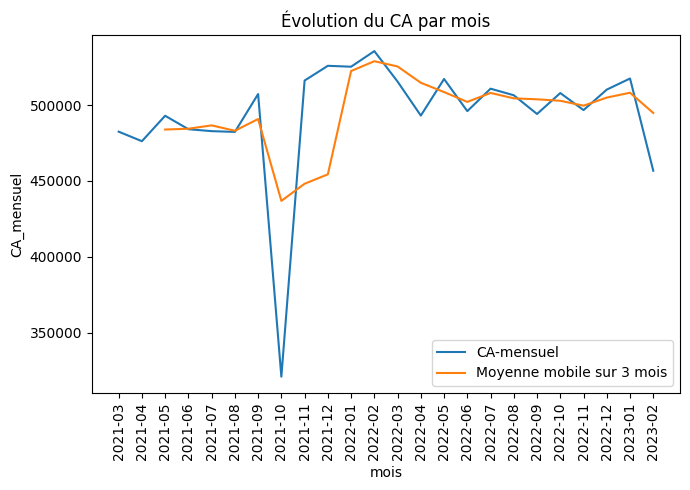

In [ ]:
# Evolution du CA par mois et moyenne mobile sur 3 mois

PCT_ca['CA_moy3'] = PCT_ca['CA_mensuel'].rolling(3).mean() # calcul des valeurs de la moyenne mobile

plt.figure(figsize=(7,5))
plt.title("Évolution du CA par mois")
sns.lineplot(x='mois', y='CA_mensuel', data=PCT_ca, label = 'CA-mensuel')
sns.lineplot(x='mois', y='CA_moy3', data=PCT_ca, label = 'Moyenne mobile sur 3 mois')
plt.xticks(rotation=90)
plt.tight_layout()



On constate une chute très importante en octobre 2021 puis une 2ème plus modérée en février 2023.

On va regarder l'évolution du CA par catégorie :

### 3.2.2 Evolution du CA par mois et par catégorie

In [ ]:
# Groupé par mois et catégorie

PCT_ca_categ=PCT.groupby(['categ','mois'])['price'].sum().reset_index()
PCT_ca_categ=PCT_ca_categ.rename(columns={'price':'CA_mensuel'})
PCT_ca_categ.head()

categ     mois  CA_mensuel
0      0  2021-03   193719.08
1      0  2021-04   205362.32
2      0  2021-05   196266.64
3      0  2021-06   168013.08
4      0  2021-07   144790.75

In [ ]:
PCT_ca_categ['mois']=pd.to_datetime(PCT_ca_categ['mois'])

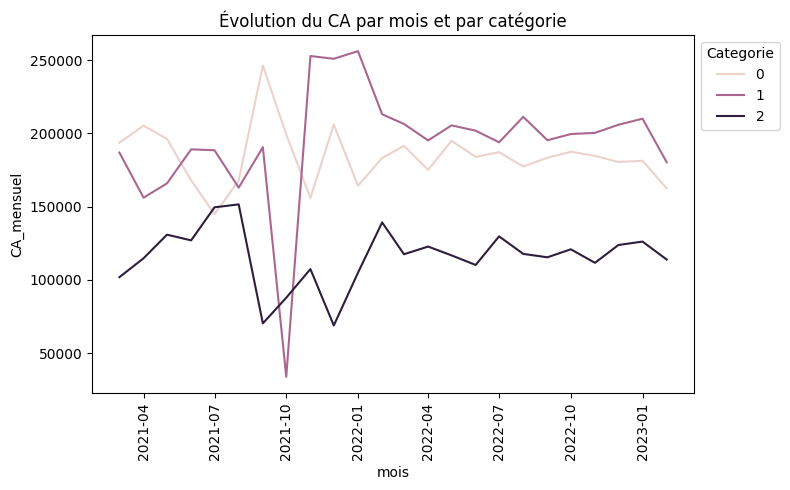

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Évolution du CA par mois et par catégorie")
sns.lineplot(data=PCT_ca_categ, x='mois', y='CA_mensuel', hue = 'categ')
plt.legend(title='Categorie', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()

La chute importante de CA en octobre 2021 semble venir des produits de catégorie 1. On va regarder le volume de ventes par catégorie.

La baisse de février 2023 affecte par contre les 3 categories.

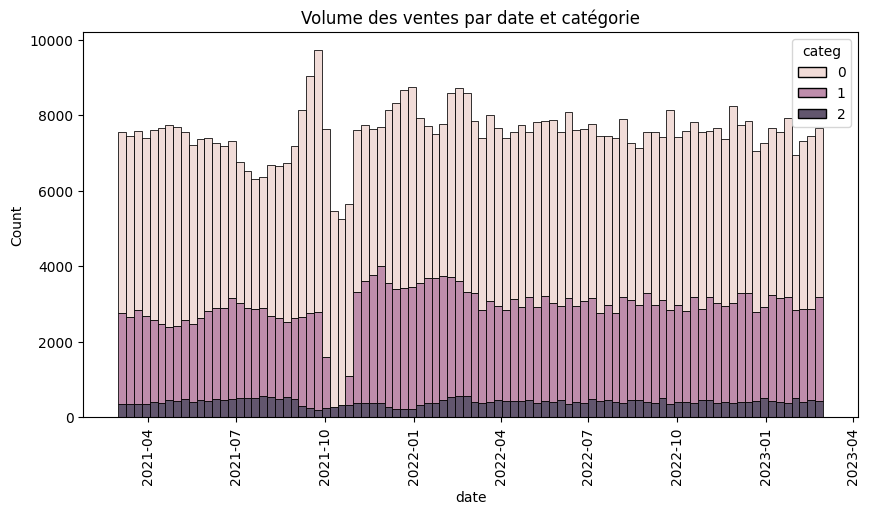

In [ ]:
# Evolution du volume de vente par catégorie

plt.figure(figsize=(10,5))
ax = sns.histplot(data=PCT, x='date', hue='categ', multiple='stack')

plt.xticks(rotation=90)
plt.title('Volume des ventes par date et catégorie')
plt.show()

On constate sur ce graphique qu'il n'y aurai aucune vente de catégorie 1 pour toute une partie du mois d'octobre 2021. Il s'agit très probablement de données manquantes.

Afin de pouvoir suivre l'évolution de manière 'équitable' entre chaque catégorie, il faut donc supprimer toutes les données du mois d'octobre 2021.

In [ ]:
# Liste des ventes en octobre 2021

PCT['mois'] = pd.to_datetime(PCT['mois'])

vente_octobre=PCT[(PCT['mois']>='2021-10-01') & (PCT['mois']<='2021-10-31')]
vente_octobre.head()


id_prod  price  categ client_id sex  birth  age                       date  \
68  0_1409   4.99      0    c_5725   m   1975   48 2021-10-02 17:39:26.919537   
71  0_1247  15.99      0    c_3394   f   1978   45 2021-10-03 16:05:12.544172   
80  0_1272  17.01      0    c_8534   m   1988   35 2021-10-13 14:35:01.163737   
86  0_1102   4.63      0    c_1609   m   1980   43 2021-10-24 13:25:39.888945   
93  0_1079   5.99      0    c_7918   m   1987   36 2021-10-05 21:57:27.673800   

   session_id       mois année  
68    s_99013 2021-10-01  2021  
71    s_99443 2021-10-01  2021  
80   s_104207 2021-10-01  2021  
86   s_109442 2021-10-01  2021  
93   s_100557 2021-10-01  2021

In [ ]:
# Calcul de la proportion de la partie à supprimer par rapport au nombre de ventes puis au CA

proportion_supprime = round((len(vente_octobre)/PCT.shape[0])*100,2)
print( " les ventes d'octobre 2021 représentent {} % du nombre de ligne de vente du df transactions".format(proportion_supprime))

 les ventes d'octobre 2021 représentent 3.18 % du nombre de ligne de vente du df transactions


In [ ]:
CA_vente_octobre = vente_octobre['price'].sum()
CA_vente_octobre_prop =round((CA_vente_octobre/CA_total)*100,2)
print("les ventes d'octobre 2021 représentent = {} % du CA des ventes totales".format(CA_vente_octobre_prop))


les ventes d'octobre 2021 représentent = 2.71 % du CA des ventes totales


In [ ]:
# Suppression des lignes du mois d'octobre 2021 du df principal

PCT_sans_octobre = PCT[~PCT['mois'].isin(vente_octobre['mois'])]


On refait maintenant le suivi du CA :

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


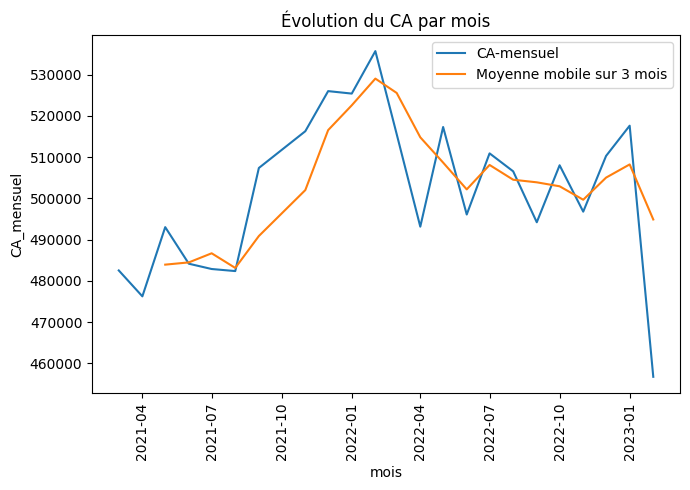

In [ ]:
PCT_ca2=PCT_sans_octobre.groupby('mois')['price'].sum().reset_index()
PCT_ca2=PCT_ca2.rename(columns={'price':'CA_mensuel'})

PCT_ca2['CA_moy3'] = PCT_ca2['CA_mensuel'].rolling(3).mean() # calcul des valeurs de la moyenne mobile

plt.figure(figsize=(7,5))
plt.title("Évolution du CA par mois")
sns.lineplot(x='mois', y='CA_mensuel', data=PCT_ca2, label = 'CA-mensuel')
sns.lineplot(x='mois', y='CA_moy3', data=PCT_ca2, label = 'Moyenne mobile sur 3 mois')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/CA.jpg')

La chute de Février 2023 apparait plus nettement. On analysera plus loin cette chute.

<ipython-input-81-650e33512365>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT_ca_categ_0['CA0_moy3'] = PCT_ca_categ_0['CA_mensuel'].rolling(3).mean() # calcul des valeurs de la moyenne mobile


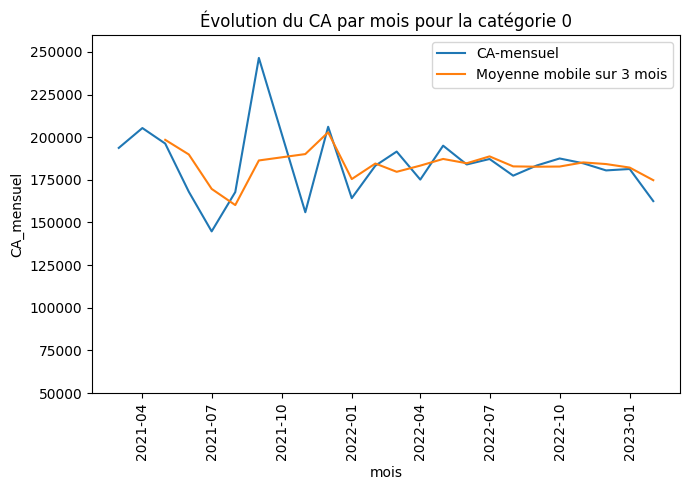

In [ ]:
# Evolution du CA mensuel pour la catégorie 0

PCT_ca_categ=PCT_sans_octobre.groupby(['categ','mois'])['price'].sum().reset_index()
PCT_ca_categ=PCT_ca_categ.rename(columns={'price':'CA_mensuel'})

PCT_ca_categ_0 = PCT_ca_categ[PCT_ca_categ['categ']==0] #selection catégorie 0
PCT_ca_categ_0['CA0_moy3'] = PCT_ca_categ_0['CA_mensuel'].rolling(3).mean() # calcul des valeurs de la moyenne mobile

plt.figure(figsize=(7,5))
plt.title("Évolution du CA par mois pour la catégorie 0")
sns.lineplot(x='mois', y='CA_mensuel', data=PCT_ca_categ_0, label = 'CA-mensuel')
sns.lineplot(x='mois', y='CA0_moy3', data=PCT_ca_categ_0, label = 'Moyenne mobile sur 3 mois')
plt.ylim(50000, 260000)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/CA_cat0.jpg')

<ipython-input-82-8a7b863674fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT_ca_categ_1['CA1_moy3'] = PCT_ca_categ_1['CA_mensuel'].rolling(3).mean() # calcul des valeurs de la moyenne mobile


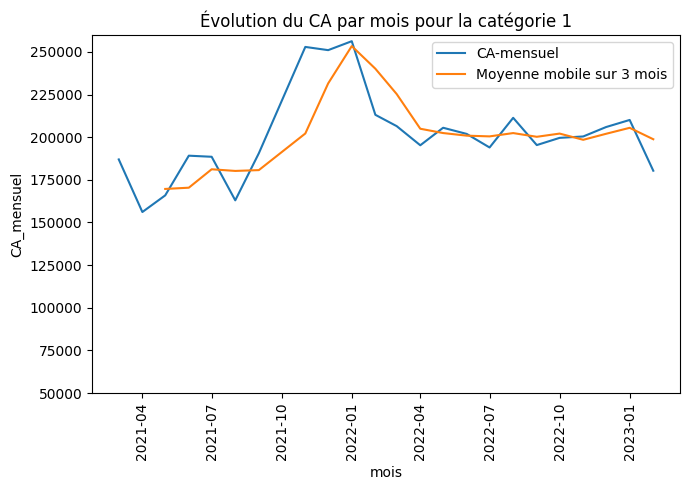

In [ ]:
# Evolution du CA mensuel pour la catégorie 1

PCT_ca_categ_1 = PCT_ca_categ[PCT_ca_categ['categ']==1] #selection catégorie 1
PCT_ca_categ_1['CA1_moy3'] = PCT_ca_categ_1['CA_mensuel'].rolling(3).mean() # calcul des valeurs de la moyenne mobile

plt.figure(figsize=(7,5))
plt.title("Évolution du CA par mois pour la catégorie 1")
sns.lineplot(x='mois', y='CA_mensuel', data=PCT_ca_categ_1, label = 'CA-mensuel')
sns.lineplot(x='mois', y='CA1_moy3', data=PCT_ca_categ_1, label = 'Moyenne mobile sur 3 mois')
plt.ylim(50000, 260000)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/CA_cat1.jpg')

<ipython-input-83-21034bc8a699>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT_ca_categ_2['CA2_moy3'] = PCT_ca_categ_2['CA_mensuel'].rolling(3).mean() # calcul des valeurs de la moyenne mobile


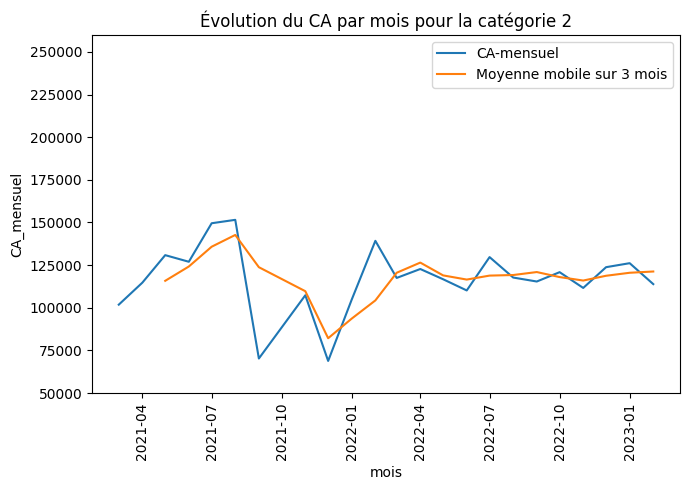

In [ ]:
#Evolution du CA mensuel pour la catégorie 2

PCT_ca_categ_2 = PCT_ca_categ[PCT_ca_categ['categ']==2] #selection catégorie 2
PCT_ca_categ_2['CA2_moy3'] = PCT_ca_categ_2['CA_mensuel'].rolling(3).mean() # calcul des valeurs de la moyenne mobile

plt.figure(figsize=(7,5))
plt.title("Évolution du CA par mois pour la catégorie 2")
sns.lineplot(x='mois', y='CA_mensuel', data=PCT_ca_categ_2, label = 'CA-mensuel')
sns.lineplot(x='mois', y='CA2_moy3', data=PCT_ca_categ_2, label = 'Moyenne mobile sur 3 mois')
plt.ylim(50000, 260000)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/CA_cat2.jpg')

Beaucoup de variation en 2021, plus stable en 2022 avec une baisse marquée pour cat 0 et 1 en février 2023.

On regardera le comportement des meilleurs clients et l'évolution du nombre de clients.

### 3.2.3 Proportion du CA annuel par catégorie

In [ ]:
# Proportion du CA  de chaque catégorie par an

CA_categ_annuel=PCT_sans_octobre.groupby(['categ','année'])['price'].sum().reset_index()
CA_categ_annuel=CA_categ_annuel.rename(columns={'price':'CA_annuel'})
CA_categ_annuel.head()

categ année   CA_annuel
0      0  2021  1684568.82
1      0  2022  2194169.26
2      0  2023   343879.92
3      1  2021  1744233.53
4      1  2022  2485275.19

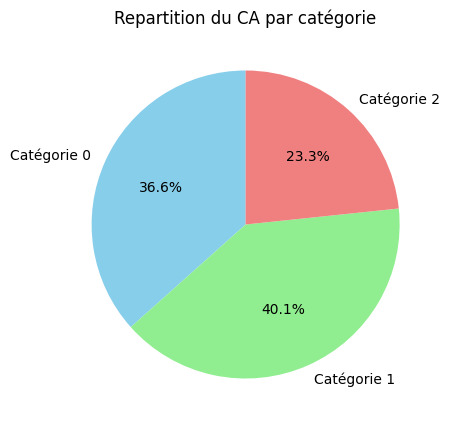

In [ ]:
# Répartition du CA par catégorie sur toute la période étudiée

CA_categ=PCT_sans_octobre.groupby(['categ'])['price'].sum().reset_index()
CA_categ=CA_categ.rename(columns={'price':'CA_annuel'})
CA_categ['categ'] = CA_categ['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende

plt.figure(figsize=(5,5))
plt.title('Repartition du CA par catégorie')
plt.pie(CA_categ['CA_annuel'], labels=CA_categ['categ'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])

plt.savefig('/content/drive/My Drive/figure_P6/CA_cat_pie.jpg')

<ipython-input-86-c8423b8b8896>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_categ_2021['categ'] = CA_categ_2021['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende


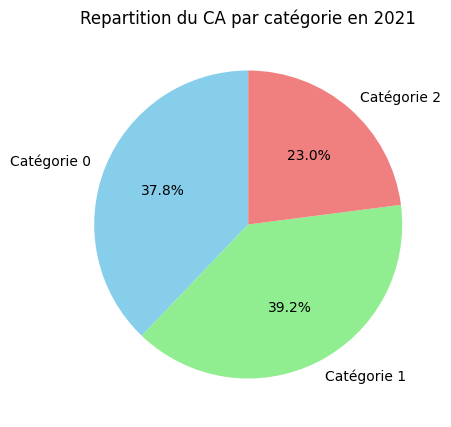

In [ ]:
# Répartition du CA par catégorie en 2021

CA_categ_2021 = CA_categ_annuel[CA_categ_annuel['année']== '2021'] #selection de l'année 2021

CA_categ_2021['categ'] = CA_categ_2021['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende

plt.figure(figsize=(5,5))
plt.title('Repartition du CA par catégorie en 2021')
plt.pie(CA_categ_2021['CA_annuel'], labels=CA_categ_2021['categ'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.show()

<ipython-input-87-e0afb2567772>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_categ_2022['categ'] = CA_categ_2022['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende


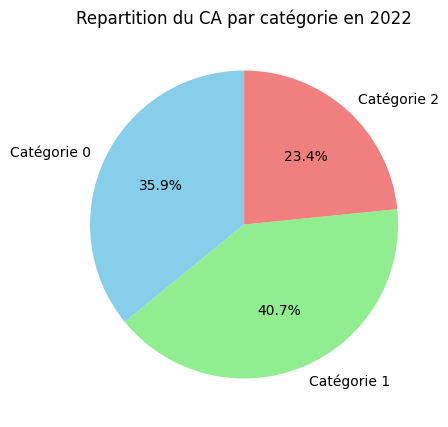

In [ ]:
# Répartition du CA par catégorie en 2022

CA_categ_2022 = CA_categ_annuel[CA_categ_annuel['année']== '2022'] #selection de l'année 2022

CA_categ_2022['categ'] = CA_categ_2022['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende

plt.figure(figsize=(5,5))
plt.title('Repartition du CA par catégorie en 2022')
plt.pie(CA_categ_2022['CA_annuel'], labels=CA_categ_2022['categ'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.show()

<ipython-input-88-4f0e1667c03e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_categ_2023['categ'] = CA_categ_2023['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende


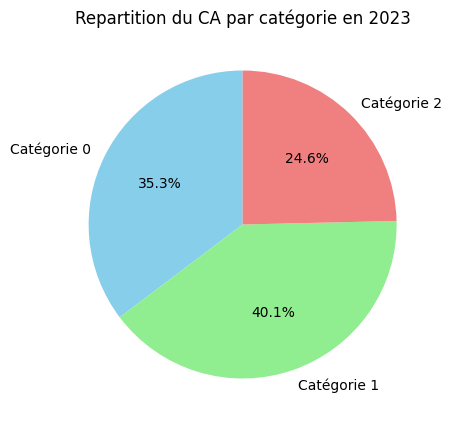

In [ ]:
# Répartition du CA par catégorie en 2023

CA_categ_2023 = CA_categ_annuel[CA_categ_annuel['année']== '2023'] #selection de l'année 2023

CA_categ_2023['categ'] = CA_categ_2023['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende

plt.figure(figsize=(5,5))
plt.title('Repartition du CA par catégorie en 2023')
plt.pie(CA_categ_2023['CA_annuel'], labels=CA_categ_2023['categ'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.show()

La répartition du CA par catégorie est très stable d'une année sur l'autre.

###3.2.4 Evolution du CA des plus gros clients

In [ ]:
# PCT_sans octobre groupé par client ID  + somme price (=CA_client)

PCT_client=PCT_sans_octobre.groupby(['client_id'])['price'].sum().sort_values(ascending = False).reset_index()
PCT_client=PCT_client.rename(columns={'price':'CA_client'})
PCT_client.head(10)

client_id  CA_client
0    c_1609  312755.08
1    c_4958  282654.61
2    c_6714  149843.69
3    c_3454  111796.68
4    c_2899    5214.05
5    c_1570    5136.14
6    c_3263    5129.89
7    c_7319    5120.55
8    c_8026    4979.40
9    c_5263    4964.87

In [ ]:
pourcentage_du_CA = round((PCT_client['CA_client'].head(4).sum()/PCT_client['CA_client'].sum())*100,2)
print(pourcentage_du_CA,'%')

7.43 %


On note 4 très gros clients qui représente 7.43% du CA. On peut parler de clients professionnels (en oposition à client particulier)

In [ ]:
# Selection des clients pro.

liste_client_pro = PCT_client['client_id'].head(4).tolist()

df_client_pro= PCT_sans_octobre[PCT_sans_octobre['client_id'].isin(liste_client_pro)]
df_client_pro.head()

id_prod  price  categ client_id sex  birth  age                       date  \
2   0_1277   7.99      0    c_6714   f   1968   55 2022-06-18 15:44:33.155329   
17   1_661  22.99      1    c_6714   f   1968   55 2022-09-13 10:18:02.746197   
32   1_426  19.44      1    c_4958   m   1999   24 2021-06-21 17:47:57.023863   
63   1_506  13.65      1    c_4958   m   1999   24 2021-09-29 03:52:29.731798   
67  0_1446   8.09      0    c_1609   m   1980   43 2022-10-05 07:43:00.225116   

   session_id       mois année  
2    s_225667 2022-06-01  2022  
17   s_267366 2022-09-01  2022  
32    s_51846 2021-06-01  2021  
63    s_97203 2021-09-01  2021  
67   s_278030 2022-10-01  2022

In [ ]:
# Mise en forme du df_client_pro

client_pro_ca = df_client_pro.groupby(['client_id','mois'])['price'].sum().reset_index()
client_pro_ca = client_pro_ca.rename(columns={'price':'CA_mensuel'})
client_pro_ca.head()


client_id       mois  CA_mensuel
0    c_1609 2021-03-01    13740.67
1    c_1609 2021-04-01    13543.34
2    c_1609 2021-05-01    13583.81
3    c_1609 2021-06-01    12392.75
4    c_1609 2021-07-01    10591.50

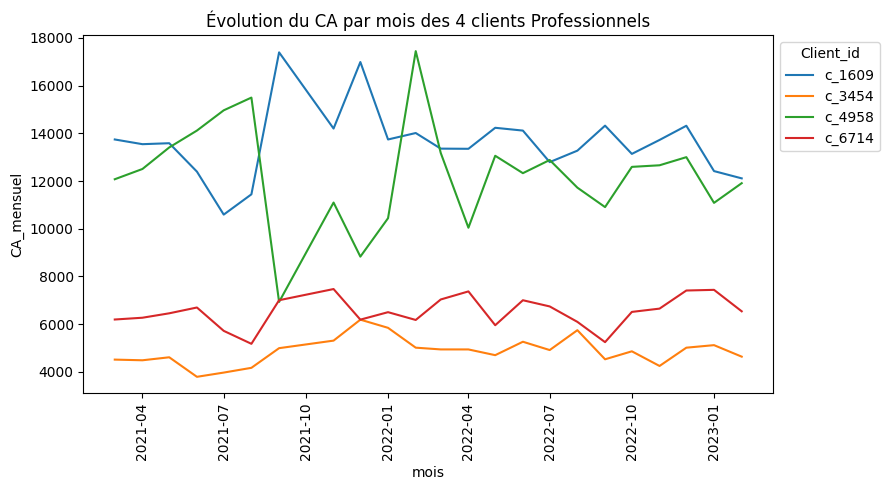

In [ ]:
# Evolution du CA des 4 clients pro

plt.figure(figsize=(9,5))
plt.title("Évolution du CA par mois des 4 clients Professionnels")
sns.lineplot(data=client_pro_ca, x='mois', y='CA_mensuel', hue = 'client_id')
plt.legend(title='Client_id', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/CA_pro.jpg')

Beaucoup de variation pour c_4958 et c-1609 en 2021, les 2 autres sont plutôt stables. En fevrier 2021 on a une légère baisse de CA pour 3 des 4 clients pro

Text(0, 0.5, 'Effectif')

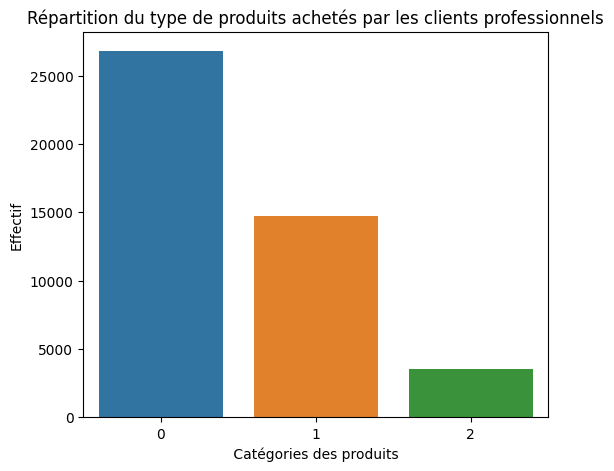

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Répartition du type de produits achetés par les clients professionnels')
sns.countplot(data=df_client_pro, x='categ')
plt.xlabel(" Catégories des produits ")
plt.ylabel("Effectif")


In [ ]:
cli_pro_categ= df_client_pro.groupby(['categ'])['price'].sum().reset_index()
cli_pro_categ.head()

categ      price
0      0  286175.21
1      1  302419.39
2      2  268455.46

In [ ]:
cli_pro_categ.dtypes

categ      int64
price    float64
dtype: object

In [ ]:
# Convertir la variable categ en entier

cli_pro_categ['categ']=cli_pro_categ['categ'].astype(int)

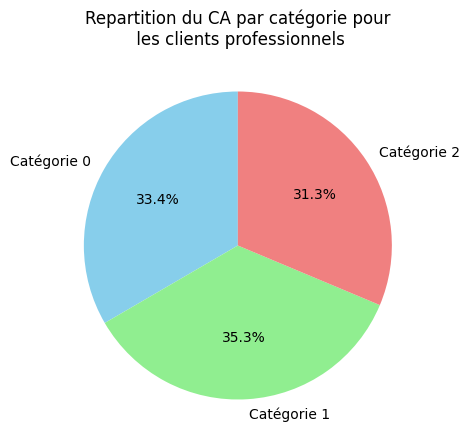

In [ ]:
# Réparition du CA  par catégorie

cli_pro_categ['categ'] = cli_pro_categ['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégories pour la légende

plt.figure(figsize=(5,5))
plt.title('Repartition du CA par catégorie pour\n les clients professionnels')
plt.pie(cli_pro_categ['price'], labels=cli_pro_categ['categ'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.savefig('/content/drive/My Drive/figure_P6/CA_cat_pro.jpg')
plt.show()


En terme de volume de ventes les clients pro achètent plutot des catégories 0 mais la répartition du CA est homogène entre les catégories.


In [ ]:
# Répartition des achats des différents clients pro

df_client_pro_categ = df_client_pro.groupby(['categ','client_id'])['price'].sum().reset_index()
df_client_pro_categ.head()

categ client_id      price
0      0    c_1609  203806.16
1      0    c_3454   27586.35
2      0    c_4958       2.99
3      0    c_6714   54779.71
4      1    c_1609  107447.71

In [ ]:
df_client_pro_pivot=df_client_pro_categ.pivot(index='client_id', columns = 'categ', values='price')
df_client_pro_pivot.head()

categ              0          1          2
client_id                                 
c_1609     203806.16  107447.71    1501.21
c_3454      27586.35   83123.61    1086.72
c_4958          2.99   39168.30  243483.32
c_6714      54779.71   72679.77   22384.21

<Figure size 900x500 with 0 Axes>

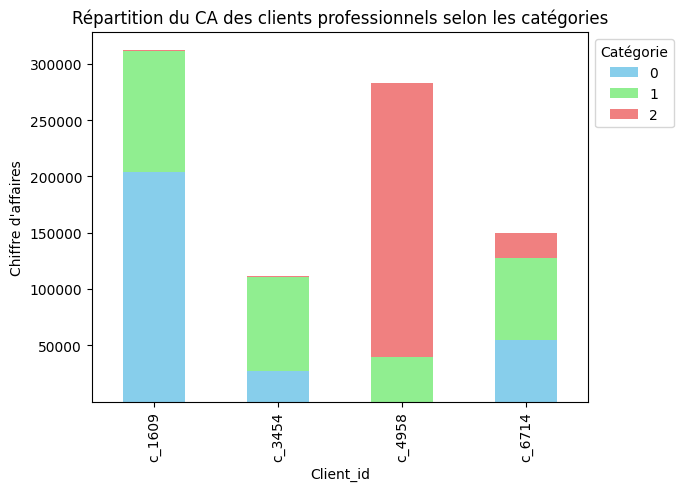

In [ ]:
plt.figure(figsize=(9,5))

df_client_pro_pivot.plot(kind='bar', stacked = True, color = ['skyblue', 'lightgreen','lightcoral'])
plt.title("Répartition du CA des clients professionnels selon les catégories")
plt.legend(title='Catégorie', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Client_id')
plt.ylabel('Chiffre d\'affaires')
plt.savefig('/content/drive/My Drive/figure_P6/CA_par_pro.jpg')

C_6714 achète des 3 catégories

c_3454 et c_1609 achètent 0 et 1 (et  quasiment pas de 2). c1609 en beaucoup plus grande quantité que c_3454

c_4958 achète un peu de 1 et beaucoup de 2 (client ++)

### 3.2.5 Evolution du nombre de client

In [ ]:
nb_client = PCT_sans_octobre.groupby(['mois'])['client_id'].nunique().reset_index()
nb_client = nb_client.rename(columns = {'client_id' : 'nb_client_id'})
nb_client.head()

mois  nb_client_id
0 2021-03-01          5676
1 2021-04-01          5674
2 2021-05-01          5644
3 2021-06-01          5659
4 2021-07-01          5672

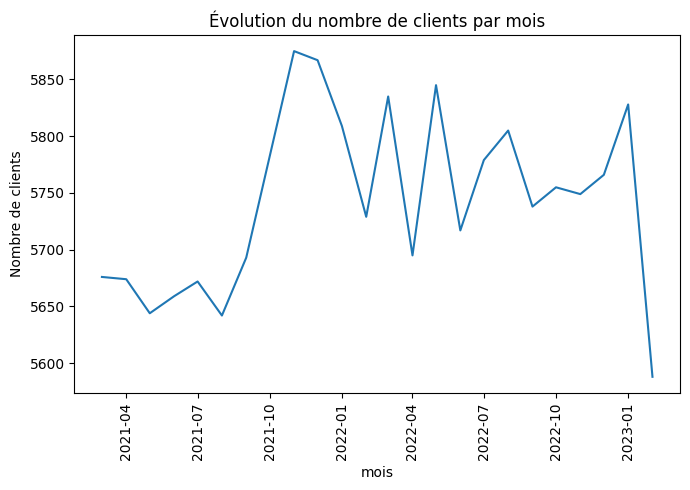

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Évolution du nombre de clients par mois")
sns.lineplot(data=nb_client,x='mois',y='nb_client_id')
plt.ylabel("Nombre de clients")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/nb_cli.jpg')

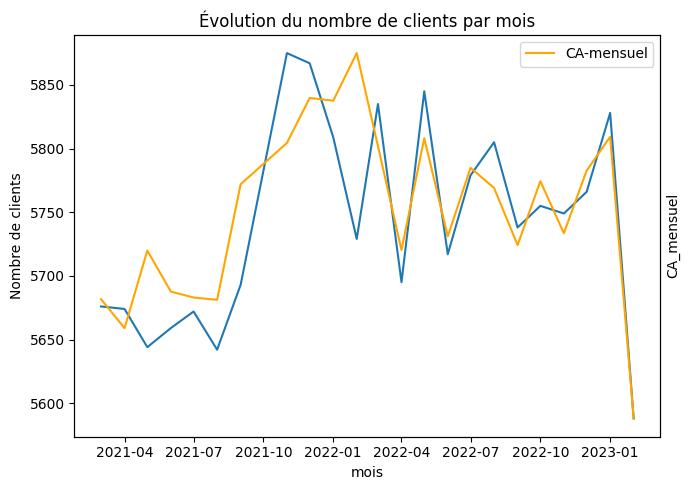

In [ ]:
# Relation nombre clients et CA
plt.figure(figsize=(7,5))
plt.title("Évolution du nombre de clients par mois")
sns.lineplot(data=nb_client,x='mois',y='nb_client_id')
plt.ylabel("Nombre de clients")

ax2 = plt.gca().twinx() # Créer un deuxième axe y à droite
sns.lineplot(x='mois', y='CA_mensuel', data=PCT_ca2, label = 'CA-mensuel',ax=ax2, color='orange')

plt.xticks(rotation=90)
ax2.set_yticklabels([]) # Enlever les étiquettes des axes y
plt.yticks([])

plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/nb_cli_CA.jpg')

Chute importante du nombre de client en février 2023

On peut regarder
 - l'évolution de la perte de clients dans le temps pour la comparer avec le CA
 - le profil des clients qui n'ont pas commandé en février 2023

In [ ]:
# Ajout de la variable  : différence nombre de client

nb_client['diff_client'] = nb_client['nb_client_id'].diff()
nb_client.head()

mois  nb_client_id  diff_client
0 2021-03-01          5676          NaN
1 2021-04-01          5674         -2.0
2 2021-05-01          5644        -30.0
3 2021-06-01          5659         15.0
4 2021-07-01          5672         13.0

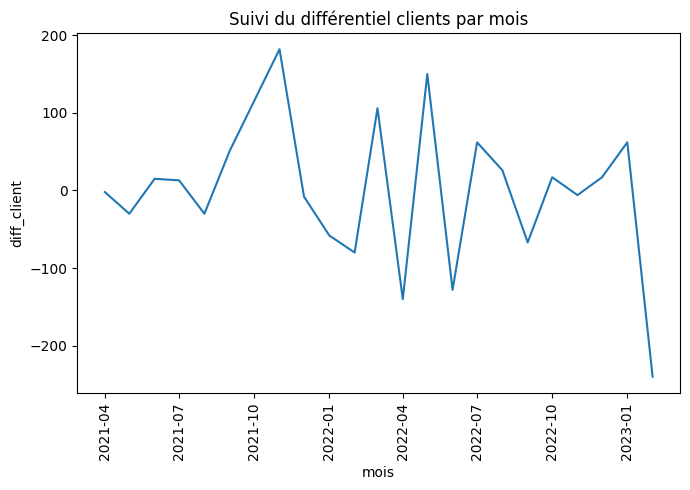

In [ ]:
plt.figure(figsize=(7,5))
plt.title("Suivi du différentiel clients par mois")
sns.lineplot(data=nb_client,x='mois',y='diff_client')

plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/dif_cli.jpg')

 - la baisse la plus importante est celle de février 2023, on retrouve cette baisse sur le CA

In [ ]:
# Recherche des clients qui n'ont pas commandé en février 2023

liste_clients_fevrier2023 = PCT.loc[PCT['mois'] =='2023-02']['client_id'].tolist()
clients_perdus_fevrier2023 = PCT[PCT['client_id'].isin(liste_clients_fevrier2023)]
clients_perdus_fevrier2023.head()


id_prod  price  categ client_id sex  birth  age                       date  \
0  0_1518   4.18      0     c_103   f   1986   37 2022-05-20 13:21:29.043970   
1   1_251  15.99      1    c_8534   m   1988   35 2022-02-02 07:55:19.149409   
2  0_1277   7.99      0    c_6714   f   1968   55 2022-06-18 15:44:33.155329   
4  0_1509   4.99      0    c_4232   m   1980   43 2023-01-11 08:22:08.194479   
5  0_1418   8.57      0    c_1478   f   1972   51 2022-10-20 15:59:16.084030   

  session_id       mois année  
0   s_211425 2022-05-01  2022  
1   s_158752 2022-02-01  2022  
2   s_225667 2022-06-01  2022  
4   s_325227 2023-01-01  2023  
5   s_285425 2022-10-01  2022

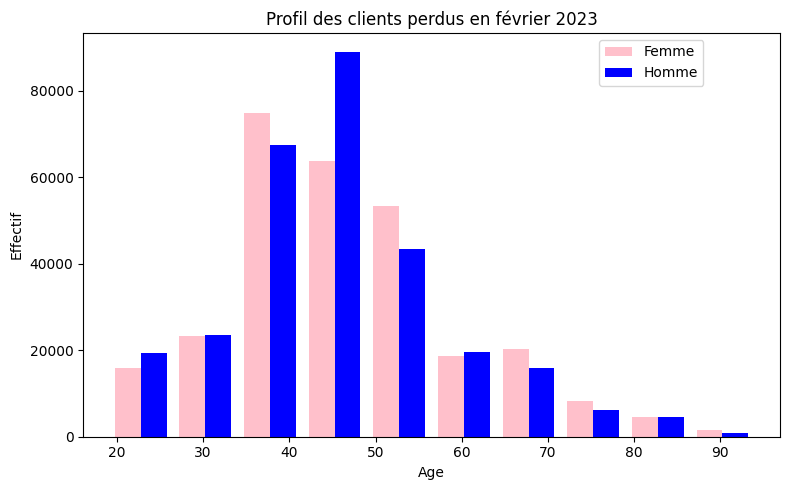

In [ ]:
# Profil des clients perdus

df_perdu_m = clients_perdus_fevrier2023[clients_perdus_fevrier2023['sex'] == 'm']
df_perdu_f = clients_perdus_fevrier2023[clients_perdus_fevrier2023['sex'] == 'f']

# Largeur des barres
bar_width = 0.6

B = ['Femme', 'Homme']

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Profil des clients perdus en février 2023")

# Tracer l'histogramme pour les hommes et les femmes
ax.hist([df_perdu_f['age'], df_perdu_m['age']], histtype='bar', label=B, color=['pink', 'blue'] )

# les axes
ax.set_xlabel('Age')
ax.set_ylabel('Effectif')

# légende
ax.legend(loc='upper right', bbox_to_anchor=(0.9, 1))
plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/profil_perdu.jpg')
plt.show()

In [ ]:
nb_perdus=clients_perdus_fevrier2023.groupby(['client_id','session_id'])['price'].mean().reset_index()
nb_perdus.head()

client_id session_id  price
0    c_1001   s_106626  15.99
1    c_1001   s_107908  14.80
2    c_1001   s_111191  15.73
3    c_1001   s_114377  14.55
4    c_1001   s_122521  15.99

In [ ]:
nb_perdus=nb_perdus.groupby('session_id')['price'].mean().reset_index()
nb_perdus=nb_perdus.rename(columns = {'price':'panier_moyen'})
nb_perdus.head()

session_id  panier_moyen
0        s_1        11.990
1       s_10        26.990
2      s_100        16.860
3     s_1000         9.805
4    s_10000        13.830

med: 14.2
moy: 18.259969735881132


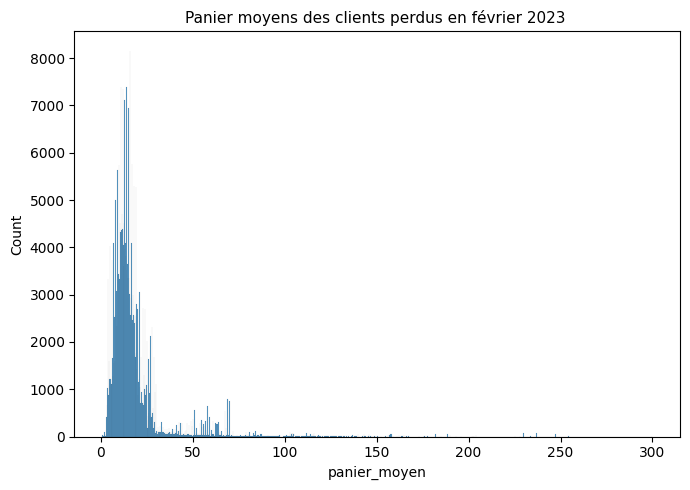

In [ ]:
#  Pnnier moyens des clients qui n'ont pas commandés en fev 2023

plt.figure(figsize=(7,5))
plt.title('Panier moyens des clients perdus en février 2023 ',fontsize=11)
sns.histplot(data=nb_perdus, x='panier_moyen')
plt.tight_layout()

print("med:",nb_perdus ['panier_moyen'].median())
print("moy:",nb_perdus ['panier_moyen'].mean())

<ipython-input-114-3cedd948c8c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients_perdus_fevrier2023['categ'] = clients_perdus_fevrier2023['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende


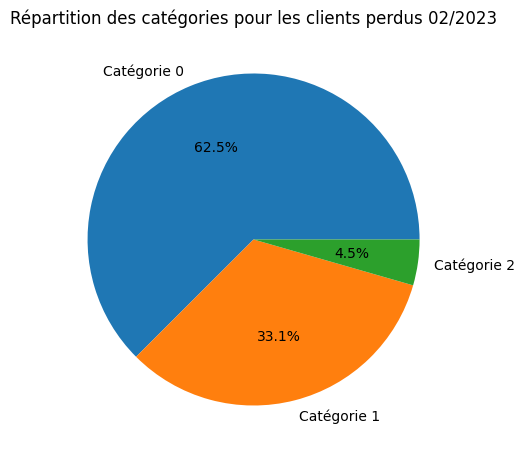

In [ ]:
# Proportion de vente par catégorie des clients perdus 02/2023

clients_perdus_fevrier2023['categ'] = clients_perdus_fevrier2023['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende

counts_client= clients_perdus_fevrier2023['categ'].value_counts()

plt.figure(figsize=(5,5))
plt.title('Répartition des catégories pour les clients perdus 02/2023')
plt.pie(counts_client, labels=counts_client.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Il ne semble pas y avoir de profil type de clients perdus. Ce sont plutôt des  paniers inférieurs à 40 euros et des achats de catégorie 0

## 3.3 Volume des ventes

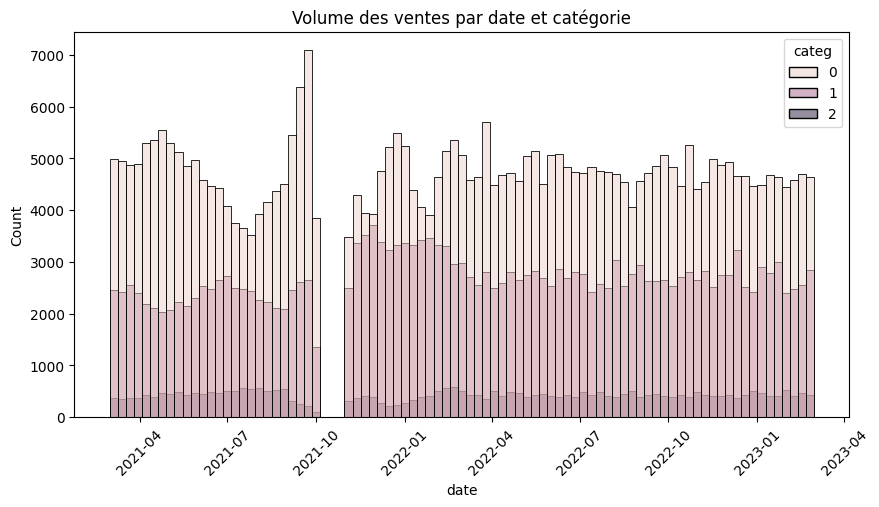

In [ ]:
## Evolution du volume de vente par catégorie (vu au 3.2.2)

plt.figure(figsize=(10,5))
sns.histplot(data=PCT_sans_octobre, x='date', hue='categ')
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie')
plt.show()

In [ ]:
# Proportion du volume de vente de chaque catégorie par an

volume_categ_annuel=PCT_sans_octobre.groupby(['categ','année'])['price'].count().reset_index()
volume_categ_annuel=volume_categ_annuel.rename(columns={'price':'volume_vente_annuel'})
volume_categ_annuel.head()


categ année  volume_vente_annuel
0      0  2021               158302
1      0  2022               206272
2      0  2023                32337
3      1  2021                85050
4      1  2022               121412

In [ ]:
volume_categ=volume_categ_annuel.groupby(['categ'])['volume_vente_annuel'].sum().reset_index()
volume_categ.head()

categ  volume_vente_annuel
0      0               396911
1      1               225503
2      2                35312

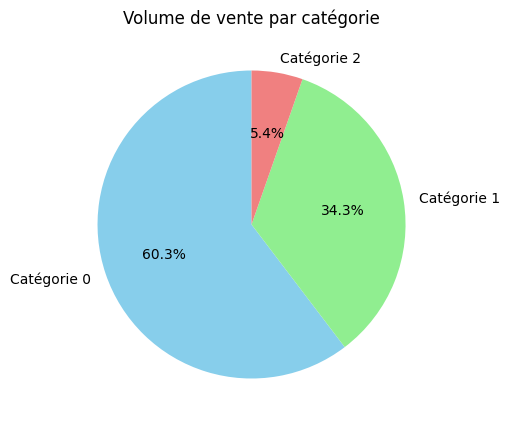

In [ ]:
# Répartition du volume de vente total par catégorie
volume_categ=volume_categ_annuel.groupby(['categ'])['volume_vente_annuel'].sum().reset_index()

volume_categ['categ'] = volume_categ['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende

plt.figure(figsize=(5,5))
plt.title('Volume de vente par catégorie')
plt.pie(volume_categ['volume_vente_annuel'], labels=volume_categ['categ'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'] )
plt.savefig('/content/drive/My Drive/figure_P6/vol_cat.jpg')
plt.show()

<ipython-input-119-c3afbdf22a6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_categ_2021['categ'] = volume_categ_2021['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende


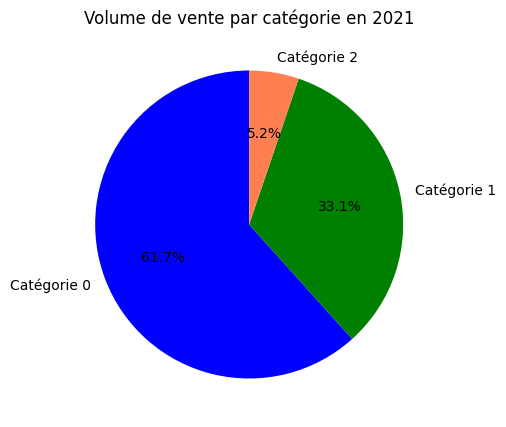

In [ ]:
# Répartition du volume de vente par catégorie en 2021

volume_categ_2021 = volume_categ_annuel[volume_categ_annuel['année']== '2021'] #selection de l'année 2022

volume_categ_2021['categ'] = volume_categ_2021['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende

plt.figure(figsize=(5,5))
plt.title('Volume de vente par catégorie en 2021')
plt.pie(volume_categ_2021['volume_vente_annuel'], labels=volume_categ_2021['categ'], autopct='%1.1f%%', startangle=90, colors=['blue', 'green', 'coral'] )

plt.show()

<ipython-input-120-fd8bcb034afa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_categ_2022['categ'] = volume_categ_2022['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende


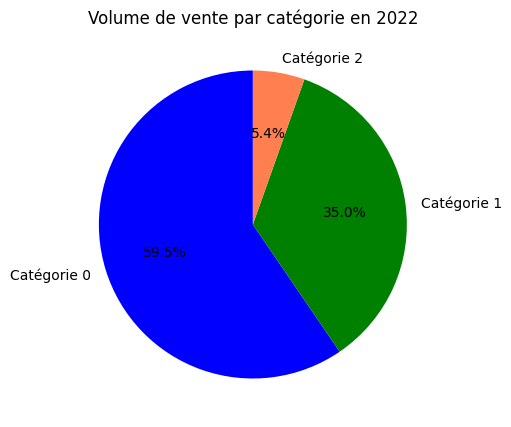

In [ ]:
# Répartition du volume de vente par catégorie en 2022

volume_categ_2022 = volume_categ_annuel[volume_categ_annuel['année']== '2022'] #selection de l'année 2022

volume_categ_2022['categ'] = volume_categ_2022['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende

plt.figure(figsize=(5,5))
plt.title('Volume de vente par catégorie en 2022')
plt.pie(volume_categ_2022['volume_vente_annuel'], labels=volume_categ_2022['categ'], autopct='%1.1f%%', startangle=90,colors=['blue', 'green', 'coral'])
plt.show()

<ipython-input-121-676656465658>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_categ_2023['categ'] = volume_categ_2023['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende


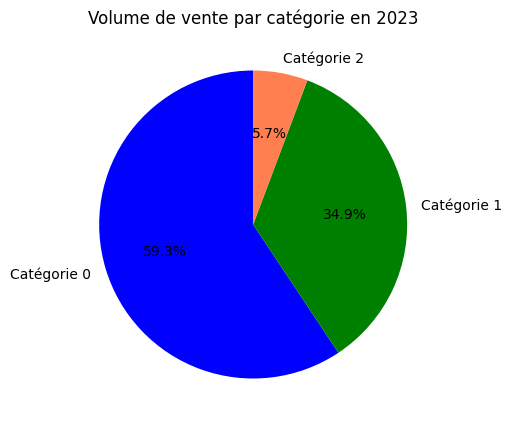

In [ ]:
# Répartition du volume de vente par catégorie en 2023

volume_categ_2023 = volume_categ_annuel[volume_categ_annuel['année']== '2023'] #selection de l'année 2023

volume_categ_2023['categ'] = volume_categ_2023['categ'].map({0: 'Catégorie 0', 1: 'Catégorie 1', 2: 'Catégorie 2'}) #renommer les catégorie pour la légende

plt.figure(figsize=(5,5))
plt.title('Volume de vente par catégorie en 2023')
plt.pie(volume_categ_2023['volume_vente_annuel'], labels=volume_categ_2023['categ'], autopct='%1.1f%%', startangle=90 , colors=['blue', 'green', 'coral'])
plt.show()

Le volume de vente le plus important est la catégorie 0, puis 1 puis 2 . La répartition est très stable d'une année sur l'autre.

##3.4 Tops et Flops des produits

#### 3.4.1 Tops et flops en fonction du CA

In [ ]:
# PCT groupé par id-prod et calcul somme price et nombre  price

df_id_prod=PCT_sans_octobre.groupby("id_prod", as_index=False).agg(
              CA=("price","sum"),
              volume_vente=("price","count"))
df_id_prod.head()

id_prod       CA  volume_vente
0     0_0  4477.50          1194
1     0_1  5154.31           469
2    0_10   323.10            18
3   0_100    61.80             3
4  0_1000  2790.72           408

In [ ]:
# Liste des 10 produits avec les meilleurs CA

L_top_vente= df_id_prod.sort_values('CA',ascending=False).head(10)['id_prod'].tolist()
print(L_top_vente)

['2_159', '2_135', '2_112', '2_102', '2_209', '1_395', '1_369', '2_110', '1_414', '2_39']


In [ ]:
# Liste produit 10 plus bas CA par produits

L_flop_vente= df_id_prod.sort_values('CA',ascending=True).head(10)['id_prod'].tolist()
print(L_flop_vente)

['0_1539', '0_898', '0_1284', '0_643', '0_1653', '0_807', '0_541', '0_1601', '0_1728', '0_324']


In [ ]:
# top vente
PCT_top_vente=PCT_sans_octobre.loc[PCT['id_prod'].isin(L_top_vente)]


In [ ]:
top_vente=PCT_top_vente.groupby("id_prod", as_index=False).agg(
              CA_produit=("price","sum"),
              volume_vente=("price","count")
).sort_values(by="CA_produit", ascending=False)

top_vente['prix']= top_vente['CA_produit']/top_vente['volume_vente']

top_vente.head(10)

id_prod  CA_produit  volume_vente    prix
7   2_159    92265.68           632  145.99
6   2_135    67403.23           977   68.99
5   2_112    62840.10           930   67.57
3   2_102    58962.58           997   59.14
8   2_209    55362.09           791   69.99
1   1_395    53950.39          1861   28.99
0   1_369    53665.63          2237   23.99
4   2_110    51916.50           834   62.25
2   1_414    51615.78          2166   23.83
9    2_39    51147.18           882   57.99

7 des 10 produits ayant le meilleur CA sont de catégories 2.

In [ ]:
# FLop vente

PCT_flop_vente=PCT_sans_octobre.loc[PCT['id_prod'].isin(L_flop_vente)]


In [ ]:
flop_vente=PCT_flop_vente.groupby("id_prod", as_index= False).agg(
              CA_produit=("price","sum"),
              volume_vente=("price","count")
).sort_values(by="CA_produit")

flop_vente.head(10)

id_prod  CA_produit  volume_vente
1  0_1539        0.99             1
9   0_898        1.27             1
0  0_1284        1.38             1
3  0_1653        1.98             2
7   0_643        1.98             2
2  0_1601        1.99             1
6   0_541        1.99             1
8   0_807        1.99             1
4  0_1728        2.27             1
5   0_324        2.36             2

On peut regarder le CA total des ID qui n'ont que 1, 2 ou 3 ventes pour mesurer l'intérêt de les garder au catalogue



In [ ]:
petit_volume = [0,1,2,3]
flop_vente_ca=df_id_prod[df_id_prod['volume_vente'].isin(petit_volume)]
flop_vente_ca.head()

id_prod     CA  volume_vente
3    0_100  61.80             3
17  0_1012  97.20             3
41  0_1037  62.97             3
62  0_1056   7.38             3
78  0_1071  68.97             3

In [ ]:
len(flop_vente_ca)

107

In [ ]:
# Ajout des catégories des produits de 0 à 3 ventes

new2 = flop_vente_ca["id_prod"].str.split("_", n = 1, expand = True)
flop_vente_ca["categ_id"]= new2[0]

flop_vente_ca.head()

<ipython-input-131-683641d8eed7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flop_vente_ca["categ_id"]= new2[0]


id_prod     CA  volume_vente categ_id
3    0_100  61.80             3        0
17  0_1012  97.20             3        0
41  0_1037  62.97             3        0
62  0_1056   7.38             3        0
78  0_1071  68.97             3        0

In [ ]:
# Quelles catégories font parie les flop vente

liste_categ_flop = flop_vente_ca['categ_id'].unique().tolist()
print(liste_categ_flop)

['0', '1', '2']


In [ ]:
# Création du df CA en fonction des cétégories pour les flop ventes

flop_vente_groupé=flop_vente_ca.groupby('categ_id')['CA'].sum().reset_index()
flop_vente_groupé.head()

categ_id       CA
0        0  2814.89
1        1   617.78
2        2  2433.32

In [ ]:
flop_vente_groupé.dtypes

categ_id     object
CA          float64
dtype: object

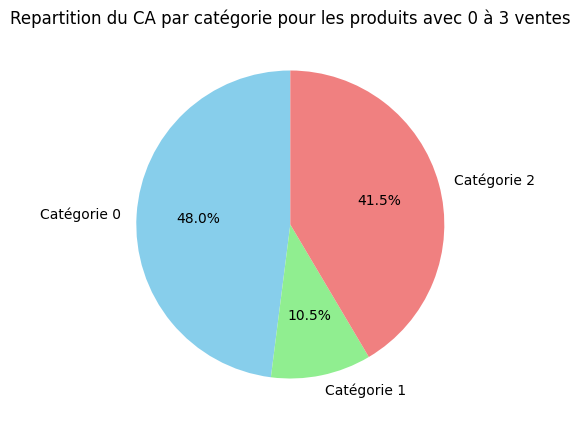

In [ ]:
# répartition des catégories

flop_vente_groupé['categ_id'] = flop_vente_groupé['categ_id'].map({'0': 'Catégorie 0', '1': 'Catégorie 1', '2': 'Catégorie 2'}) #renommer les catégories pour la légende


plt.figure(figsize=(5,5))
plt.title('Repartition du CA par catégorie pour les produits avec 0 à 3 ventes')
plt.pie(flop_vente_groupé['CA'], labels=flop_vente_groupé['categ_id'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.show()

In [ ]:
CA_total_flop= flop_vente_ca['CA'].sum()
print(CA_total_flop)

5865.99


Les ventes de 0 à 3 produits représente 0.049% du CA de la période étudiée.  

###3.4.2 Tops et flops en fonction du volume de vente


In [ ]:
# Liste produit 10 meilleurs volume de vente

L_top_volume = df_id_prod.sort_values('volume_vente',ascending=False).head(10)['id_prod'].tolist()
print(L_top_volume)

['1_369', '1_417', '1_414', '1_498', '1_425', '1_403', '1_412', '1_413', '1_406', '1_407']


In [ ]:
# Liste produit 10 plus mauvais volume de vente

L_flop_volume = df_id_prod.sort_values('volume_vente',ascending=True).head(10)['id_prod'].tolist()
print(L_flop_volume)

['0_980', '2_23', '0_1533', '0_1284', '0_886', '2_81', '0_549', '0_541', '0_1601', '0_1683']


In [ ]:
# Top volume

PCT_top_volume=PCT_sans_octobre.loc[PCT['id_prod'].isin(L_top_volume)]
PCT_top_volume.head()

id_prod  price  categ client_id sex  birth  age  \
53    1_406  24.81      1    c_2831   m   2003   20   
79    1_369  23.99      1    c_1464   f   1986   37   
83    1_414  23.83      1    c_5785   f   1983   40   
127   1_407  15.99      1    c_4712   f   1977   46   
169   1_406  24.81      1    c_4474   f   1990   33   

                          date session_id       mois année  
53  2021-05-18 03:32:47.072713    s_36004 2021-05-01  2021  
79  2022-08-12 21:21:37.350040   s_252381 2022-08-01  2022  
83  2022-11-13 09:02:12.691434   s_296911 2022-11-01  2022  
127 2022-05-11 20:27:02.890141   s_207107 2022-05-01  2022  
169 2022-02-28 00:08:57.801508   s_171929 2022-02-01  2022

In [ ]:
top_vol=PCT_top_volume.groupby("id_prod", as_index=False).agg(
              CA_produit=("price","sum"),
              volume_vente=("price","count")
).sort_values(by="volume_vente", ascending=False)

top_vol['prix']= top_vol['CA_produit']/top_vol['volume_vente']

top_vol.head(10)

id_prod  CA_produit  volume_vente   prix
0   1_369    53665.63          2237  23.99
7   1_417    45611.27          2173  20.99
6   1_414    51615.78          2166  23.83
9   1_498    49474.29          2117  23.37
8   1_425    35407.16          2084  16.99
1   1_403    35080.50          1950  17.99
4   1_412    32267.70          1938  16.65
2   1_406    47908.11          1931  24.81
5   1_413    34738.69          1931  17.99
3   1_407    30748.77          1923  15.99

Les plus gros volumes de vente sont de catégorie 1

In [ ]:
# Flop volume / Intérêt ??
PCT_flop_volume=PCT.loc[PCT['id_prod'].isin(L_flop_volume)]

flop_vol=PCT_flop_volume.groupby("id_prod", as_index=False).agg(
              CA_produit=("price","sum"),
              volume_vente=("price","count")
).sort_values(by="volume_vente")

flop_vol['prix']= flop_vol['CA_produit']/flop_vol['volume_vente']

flop_vol.head(10)



id_prod  CA_produit  volume_vente    prix
0  0_1284        1.38             1    1.38
2  0_1601        1.99             1    1.99
3  0_1683        2.99             1    2.99
4   0_541        1.99             1    1.99
5   0_549        2.99             1    2.99
6   0_886       21.82             1   21.82
8    2_23      115.99             1  115.99
9    2_81       86.99             1   86.99
1  0_1533       55.98             2   27.99
7   0_980       62.12             2   31.06

## 3.5 Profils des clients et répartition du CA entre les clients et entre les différents produits (courbe de Lorenz)

In [ ]:
df_client = PCT_sans_octobre.groupby(['client_id','age','sex'])['price'].sum().reset_index()
df_client = df_client.rename(columns = {'price' : 'CA_client'})
df_client.head()

client_id  age sex  CA_client
0       c_1   68   m     550.19
1      c_10   67   m    1353.60
2     c_100   31   m     254.85
3    c_1000   57   f    2209.92
4    c_1001   41   m    1720.08

###3.5.1 Profil des clients

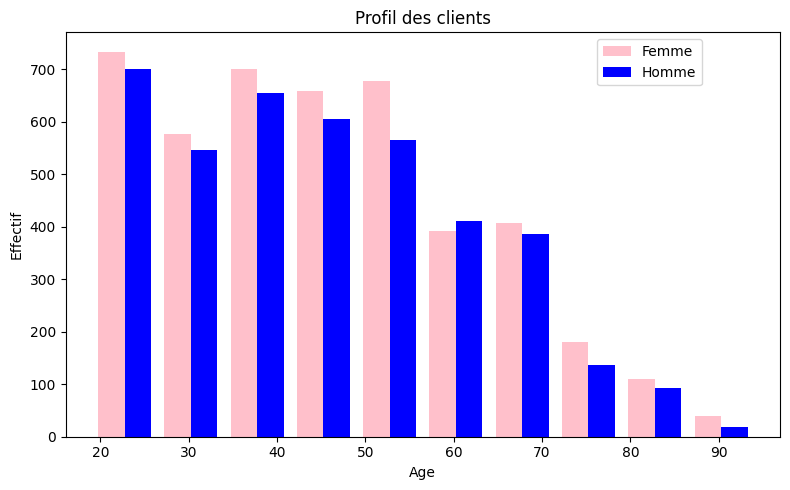

In [ ]:
df_client_m = df_client[df_client['sex'] == 'm']
df_client_f = df_client[df_client['sex'] == 'f']

# Largeur des barres
bar_width = 0.6

B = ['Femme', 'Homme']

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Profil des clients")

# Tracer l'histogramme pour les hommes et les femmes
ax.hist([df_client_f['age'], df_client_m['age']], histtype='bar', label=B, color=['pink', 'blue'] )

# les axes
ax.set_xlabel('Age')
ax.set_ylabel('Effectif')

# légende
ax.legend(loc='upper right', bbox_to_anchor=(0.9, 1))
plt.tight_layout()
plt.savefig('/content/drive/My Drive/figure_P6/profil.jpg')
plt.show()

On savait déjà que la population était plutôt homogène entre hommes et femmes. Large majorité au dessous de 50 ans mais pas de profil type

### 3.5.2 Répartition du CA entre les clients

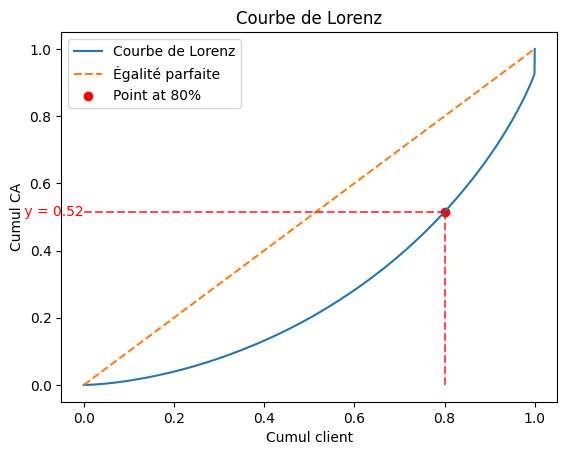

In [ ]:
# Courbe de Lorenz avec les dépenses de tous les clients

# Courbe de Lorenz avec tous les clients

CA = df_client['CA_client'].values
n = len(CA)

# Calcul de la courbe de Lorenz
lorenz = np.cumsum(np.sort(CA)) / np.sum(CA)
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

# Paramètres pour la courbe de Lorenz
xaxis = np.linspace(0, 1, n + 1)

# Tracé de la courbe de Lorenz
plt.plot(xaxis, lorenz, label='Courbe de Lorenz')

# Tracé de la ligne d'égalité parfaite
plt.plot([0, 1], [0, 1], linestyle='--', label='Égalité parfaite')

# Trouver l'indice correspondant à x = 0.8
index_80_percent = np.argmax(xaxis >= 0.8)

# Coordonnées du point sur la courbe de Lorenz
x_point = xaxis[index_80_percent]
y_point = lorenz[index_80_percent]

# Mettre en surbrillance le point d'intérêt
plt.scatter(x_point, y_point, color='red', label='Point at 80%')

# Ajouter des lignes reliant le point rouge aux axes
plt.plot([x_point, x_point], [0, y_point], linestyle='--', color='red', alpha=0.7)
plt.plot([0, x_point], [y_point, y_point], linestyle='--', color='red', alpha=0.7)

# Calculer la valeur correspondante de y
y_value = np.interp(0.8, xaxis, lorenz)

# Ajouter du texte pour afficher la valeur de y
plt.text(0, y_point, f' y = {y_value:.2f}', ha='right', va='center', color='red')

# Ajouter des labels et une légende
plt.title('Courbe de Lorenz')
plt.xlabel('Cumul client')
plt.ylabel('Cumul CA')
plt.legend()

# Afficher le graphique
plt.savefig('/content/drive/My Drive/figure_P6/Lorenz_pro.jpg')
plt.show()



On voit ici que seulement 20% des clients génèrent 48% du CA

In [ ]:
#Courbe de lorenz sans les clients pro

df_client_2= df_client[~df_client['client_id'].isin(liste_client_pro)]
df_client_2.shape[0]

8594

In [ ]:
df_client.shape[0]

8598

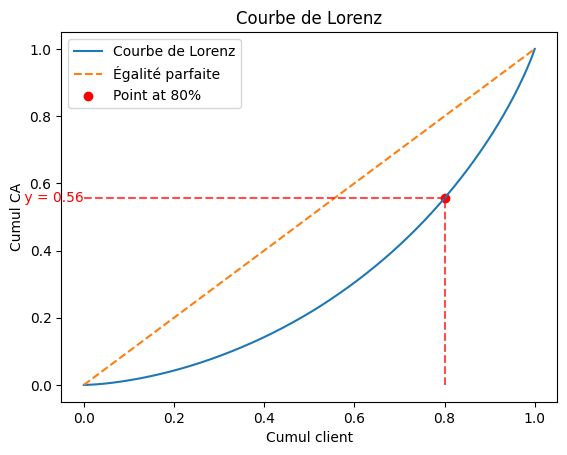

In [ ]:
# Courbe de Lorenz sans les 4  clients pro

CA = df_client_2['CA_client'].values
n = len(CA)

# Calcul de la courbe de Lorenz
lorenz = np.cumsum(np.sort(CA)) / np.sum(CA)
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

# Paramètres pour la courbe de Lorenz
xaxis = np.linspace(0, 1, n + 1)

# Tracé de la courbe de Lorenz
plt.plot(xaxis, lorenz, label='Courbe de Lorenz')

# Tracé de la ligne d'égalité parfaite
plt.plot([0, 1], [0, 1], linestyle='--', label='Égalité parfaite')

# Trouver l'indice correspondant à x = 0.8
index_80_percent = np.argmax(xaxis >= 0.8)

# Coordonnées du point sur la courbe de Lorenz
x_point = xaxis[index_80_percent]
y_point = lorenz[index_80_percent]

# Mettre en surbrillance le point d'intérêt
plt.scatter(x_point, y_point, color='red', label='Point at 80%')

# Ajouter des lignes reliant le point rouge aux axes
plt.plot([x_point, x_point], [0, y_point], linestyle='--', color='red', alpha=0.7)
plt.plot([0, x_point], [y_point, y_point], linestyle='--', color='red', alpha=0.7)

# Calculer la valeur correspondante de y
y_value = np.interp(0.8, xaxis, lorenz)

# Ajouter du texte pour afficher la valeur de y
plt.text(0, y_point, f' y = {y_value:.2f}', ha='right', va='center', color='red')

# Ajouter des labels et une légende
plt.title('Courbe de Lorenz')
plt.xlabel('Cumul client')
plt.ylabel('Cumul CA')
plt.legend()

# Afficher le graphique
plt.savefig('/content/drive/My Drive/figure_P6/Lorenz_sanspro.jpg')
plt.show()

20% des clients particuliers génèrent 44% du CA

### 3.5.3 Répartition du CA par produit

In [ ]:
df_produit = PCT.groupby('id_prod')['price'].sum().reset_index()
df_produit = df_produit.rename(columns = {'price' : 'CA_produit'})
df_produit.head()

id_prod  CA_produit
0     0_0     4657.50
1     0_1     5352.13
2    0_10      394.90
3   0_100       61.80
4  0_1000     2954.88

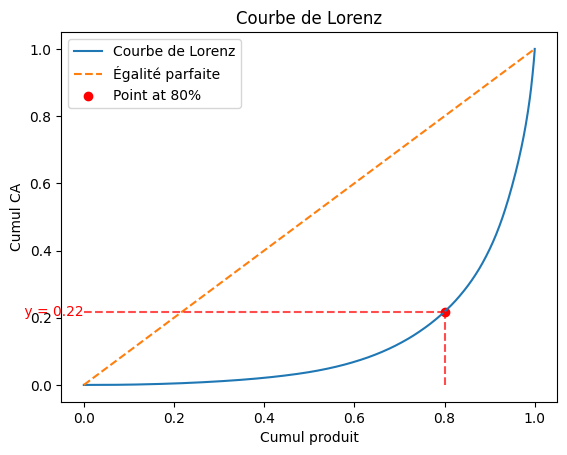

In [ ]:
CA = df_produit['CA_produit'].values
n = len(CA)

# Calcul de la courbe de Lorenz
lorenz = np.cumsum(np.sort(CA)) / np.sum(CA)
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0

# Paramètres pour la courbe de Lorenz
xaxis = np.linspace(0, 1, n + 1)

# Tracé de la courbe de Lorenz
plt.plot(xaxis, lorenz, label='Courbe de Lorenz')

# Tracé de la ligne d'égalité parfaite
plt.plot([0, 1], [0, 1], linestyle='--', label='Égalité parfaite')

# Trouver l'indice correspondant à x = 0.8
index_80_percent = np.argmax(xaxis >= 0.8)

# Coordonnées du point sur la courbe de Lorenz
x_point = xaxis[index_80_percent]
y_point = lorenz[index_80_percent]

# Mettre en surbrillance le point d'intérêt
plt.scatter(x_point, y_point, color='red', label='Point at 80%')

# Ajouter des lignes reliant le point rouge aux axes
plt.plot([x_point, x_point], [0, y_point], linestyle='--', color='red', alpha=0.7)
plt.plot([0, x_point], [y_point, y_point], linestyle='--', color='red', alpha=0.7)

# Calculer la valeur correspondante de y
y_value = np.interp(0.8, xaxis, lorenz)

# Ajouter du texte pour afficher la valeur de y
plt.text(0, y_point, f' y = {y_value:.2f}', ha='right', va='center', color='red')

# Ajouter des labels et une légende
plt.title('Courbe de Lorenz')
plt.xlabel('Cumul produit')
plt.ylabel('Cumul CA')
plt.legend()

# Afficher le graphique
plt.savefig('/content/drive/My Drive/figure_P6/Lorenz_produit.jpg')
plt.show()


20% des produits génèrent près de 80% du CA (Loi de pareto)

# 4 - Cohorte : Etude du comportement des clients au cours du temps en fonction de leur mois d'inscription

In [ ]:
# Ajout mois d'inscription de chaque client

PCT_sans_octobre['mois_inscription'] = PCT_sans_octobre.groupby('client_id')['mois'].transform('min')
PCT_sans_octobre.head()


<ipython-input-150-ce95c0adaf8a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT_sans_octobre['mois_inscription'] = PCT_sans_octobre.groupby('client_id')['mois'].transform('min')


id_prod  price  categ client_id sex  birth  age                       date  \
0  0_1518   4.18      0     c_103   f   1986   37 2022-05-20 13:21:29.043970   
1   1_251  15.99      1    c_8534   m   1988   35 2022-02-02 07:55:19.149409   
2  0_1277   7.99      0    c_6714   f   1968   55 2022-06-18 15:44:33.155329   
3   2_209  69.99      2    c_6941   m   2000   23 2021-06-24 04:19:29.835891   
4  0_1509   4.99      0    c_4232   m   1980   43 2023-01-11 08:22:08.194479   

  session_id       mois année mois_inscription  
0   s_211425 2022-05-01  2022       2021-03-01  
1   s_158752 2022-02-01  2022       2021-03-01  
2   s_225667 2022-06-01  2022       2021-03-01  
3    s_52962 2021-06-01  2021       2021-03-01  
4   s_325227 2023-01-01  2023       2021-03-01

In [ ]:
PCT2 = PCT_sans_octobre[['client_id','price','mois','mois_inscription']]
nouveaux_noms = {'price': 'achat',
                 'mois': 'mois_achat'}

PCT2.rename(columns=nouveaux_noms, inplace=True)
PCT2.head()

<ipython-input-151-ff6210447a71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT2.rename(columns=nouveaux_noms, inplace=True)


client_id  achat mois_achat mois_inscription
0     c_103   4.18 2022-05-01       2021-03-01
1    c_8534  15.99 2022-02-01       2021-03-01
2    c_6714   7.99 2022-06-01       2021-03-01
3    c_6941  69.99 2021-06-01       2021-03-01
4    c_4232   4.99 2023-01-01       2021-03-01

In [ ]:
Liste_inscription = PCT2['mois_inscription'].unique().tolist()
len(Liste_inscription)

11

In [ ]:
# Convertir les colonnes mois_achats et mois_inscription en types "category" pour l'ordre correct

PCT2['mois_achat'] = pd.to_datetime(PCT2['mois_achat'], format='%Y-%m')
PCT2['mois_inscription'] = pd.to_datetime(PCT2['mois_inscription'], format='%Y-%m')

# Réorganisation du df pour analyse

PCT3 = pd.pivot_table(PCT2, values='achat', index=['mois_inscription', 'client_id'], columns='mois_achat', aggfunc='sum').reset_index()
PCT3.head()

<ipython-input-153-6c5638f41f26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT2['mois_achat'] = pd.to_datetime(PCT2['mois_achat'], format='%Y-%m')
<ipython-input-153-6c5638f41f26>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT2['mois_inscription'] = pd.to_datetime(PCT2['mois_inscription'], format='%Y-%m')


mois_achat mois_inscription client_id  2021-03-01 00:00:00  \
0                2021-03-01      c_10                14.99   
1                2021-03-01    c_1000               160.77   
2                2021-03-01    c_1001               357.19   
3                2021-03-01    c_1003               133.96   
4                2021-03-01    c_1004                63.09   

mois_achat  2021-04-01 00:00:00  2021-05-01 00:00:00  2021-06-01 00:00:00  \
0                        108.85                  NaN                 8.41   
1                         28.99                39.63                41.70   
2                         56.15                  NaN                15.99   
3                         42.02                 6.51               102.81   
4                         23.72                15.99                33.99   

mois_achat  2021-07-01 00:00:00  2021-08-01 00:00:00  2021-09-01 00:00:00  \
0                         55.97               152.95               111.74   
1                         39.23                72.03                98.89   
2                           NaN                46.23               125.13   
3                         14.99                  NaN                 7.45   
4                         28.45               107.36                36.70   

mois_achat  2021-11-01 00:00:00  ...  2022-05-01 00:00:00  \
0                         45.98  ...                23.56   
1                        100.91  ...               193.17   
2                        120.72  ...                13.50   
3                         81.34  ...                  NaN   
4                         27.99  ...                  NaN   

mois_achat  2022-06-01 00:00:00  2022-07-01 00:00:00  2022-08-01 00:00:00  \
0                         25.93                  NaN               123.96   
1                         42.32                27.99                59.23   
2                        157.16                79.19                33.61   
3                        131.36                52.16                  NaN   
4                         60.68                  NaN                84.22   

mois_achat  2022-09-01 00:00:00  2022-10-01 00:00:00  2022-11-01 00:00:00  \
0                           NaN               139.63                  NaN   
1                           NaN                72.21               175.00   
2                         11.25                  NaN               129.17   
3                         64.15                82.17                34.43   
4                         24.99                68.69                60.68   

mois_achat  2022-12-01 00:00:00  2023-01-01 00:00:00  2023-02-01 00:00:00  
0                        103.66               164.49                  NaN  
1                        238.84                92.90                  NaN  
2                         91.97               100.70                42.89  
3                         48.96               119.28                22.13  
4                         33.99                36.70                51.00  

[5 rows x 25 columns]

In [ ]:
# Grouper les mois d'inscription avec la valeur moyenne de CA

PCT4 = PCT3.groupby(['mois_inscription']).mean()
PCT4


<ipython-input-154-5839531d3f1a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  PCT4 = PCT3.groupby(['mois_inscription']).mean()


mois_achat        2021-03-01  2021-04-01  2021-05-01  2021-06-01  2021-07-01  \
mois_inscription                                                               
2021-03-01         85.012424   90.517739   93.111930   90.830732   88.843848   
2021-04-01               NaN   65.075988   72.877881   69.481799   79.021246   
2021-05-01               NaN         NaN   69.550015   73.259777   69.203138   
2021-06-01               NaN         NaN         NaN   69.489350   77.018527   
2021-07-01               NaN         NaN         NaN         NaN   62.431714   
2021-08-01               NaN         NaN         NaN         NaN         NaN   
2021-09-01               NaN         NaN         NaN         NaN         NaN   
2021-11-01               NaN         NaN         NaN         NaN         NaN   
2021-12-01               NaN         NaN         NaN         NaN         NaN   
2022-01-01               NaN         NaN         NaN         NaN         NaN   
2022-02-01               NaN         NaN         NaN         NaN         NaN   

mois_achat        2021-08-01  2021-09-01  2021-11-01  2021-12-01  2022-01-01  \
mois_inscription                                                               
2021-03-01         89.599954   98.042728   95.679017   98.735551   98.195214   
2021-04-01         74.596934   64.689084   68.971444   63.502902   72.337108   
2021-05-01         75.900289   62.332689   62.676758   69.734024   68.854048   
2021-06-01         79.710211   58.611745   68.194467   63.149387   63.956301   
2021-07-01         73.458904   64.230984   65.969385   59.896230   46.459872   
2021-08-01         64.165902   68.716531   47.503725   46.034490   74.576731   
2021-09-01               NaN   41.273684   73.495161   47.892917   54.132069   
2021-11-01               NaN         NaN   56.806667   47.550000   52.728000   
2021-12-01               NaN         NaN         NaN   73.968966   39.261818   
2022-01-01               NaN         NaN         NaN         NaN   86.874211   
2022-02-01               NaN         NaN         NaN         NaN         NaN   

mois_achat        ...  2022-05-01  2022-06-01  2022-07-01  2022-08-01  \
mois_inscription  ...                                                   
2021-03-01        ...   95.741485   93.330379   94.312983   93.980946   
2021-04-01        ...   69.812002   67.385587   73.590482   72.149313   
2021-05-01        ...   68.456319   67.061613   70.303379   60.781165   
2021-06-01        ...   60.895635   62.831845   61.847559   68.705704   
2021-07-01        ...   55.632740   53.292826   65.050370   51.110580   
2021-08-01        ...   48.475641   62.495333   72.168696   73.601471   
2021-09-01        ...   59.091923   42.571333   40.186154   63.851053   
2021-11-01        ...   74.963333   52.501667   65.368333   32.809000   
2021-12-01        ...   81.645000   41.396667   52.245000   45.973333   
2022-01-01        ...  104.350000  147.923333  167.340000   92.563333   
2022-02-01        ...   27.130000   32.985000   20.586667         NaN   

mois_achat        2022-09-01  2022-10-01  2022-11-01  2022-12-01  2023-01-01  \
mois_inscription                                                               
2021-03-01         92.557000   95.260026   92.954840   95.709545   95.253235   
2021-04-01         69.982110   71.780155   70.537247   70.226190   71.872331   
2021-05-01         61.121250   67.091489   64.146028   66.142292   73.523533   
2021-06-01         70.271032   56.050672   58.611520   58.629932   62.558092   
2021-07-01         61.085333   55.000377   47.224407   53.384242   63.365479   
2021-08-01         65.494545   63.891282   59.523750   50.792083   65.046230   
2021-09-01         42.919615   43.913750   42.212857   60.922500   30.221053   
2021-11-01         50.585714   23.008571   49.510000   24.487500   85.918000   
2021-12-01         74.698750   23.400000   75.520000   75.660000   40.715000   
2022-01-01         48.860000   57.630000   48.450000   72.020000  122.305000   
2022-02-

A priori pas de nouveaux incrit depuis février 2022 - Est ce que c'est un biais
 du jeux de donnée ou un réel problème ??

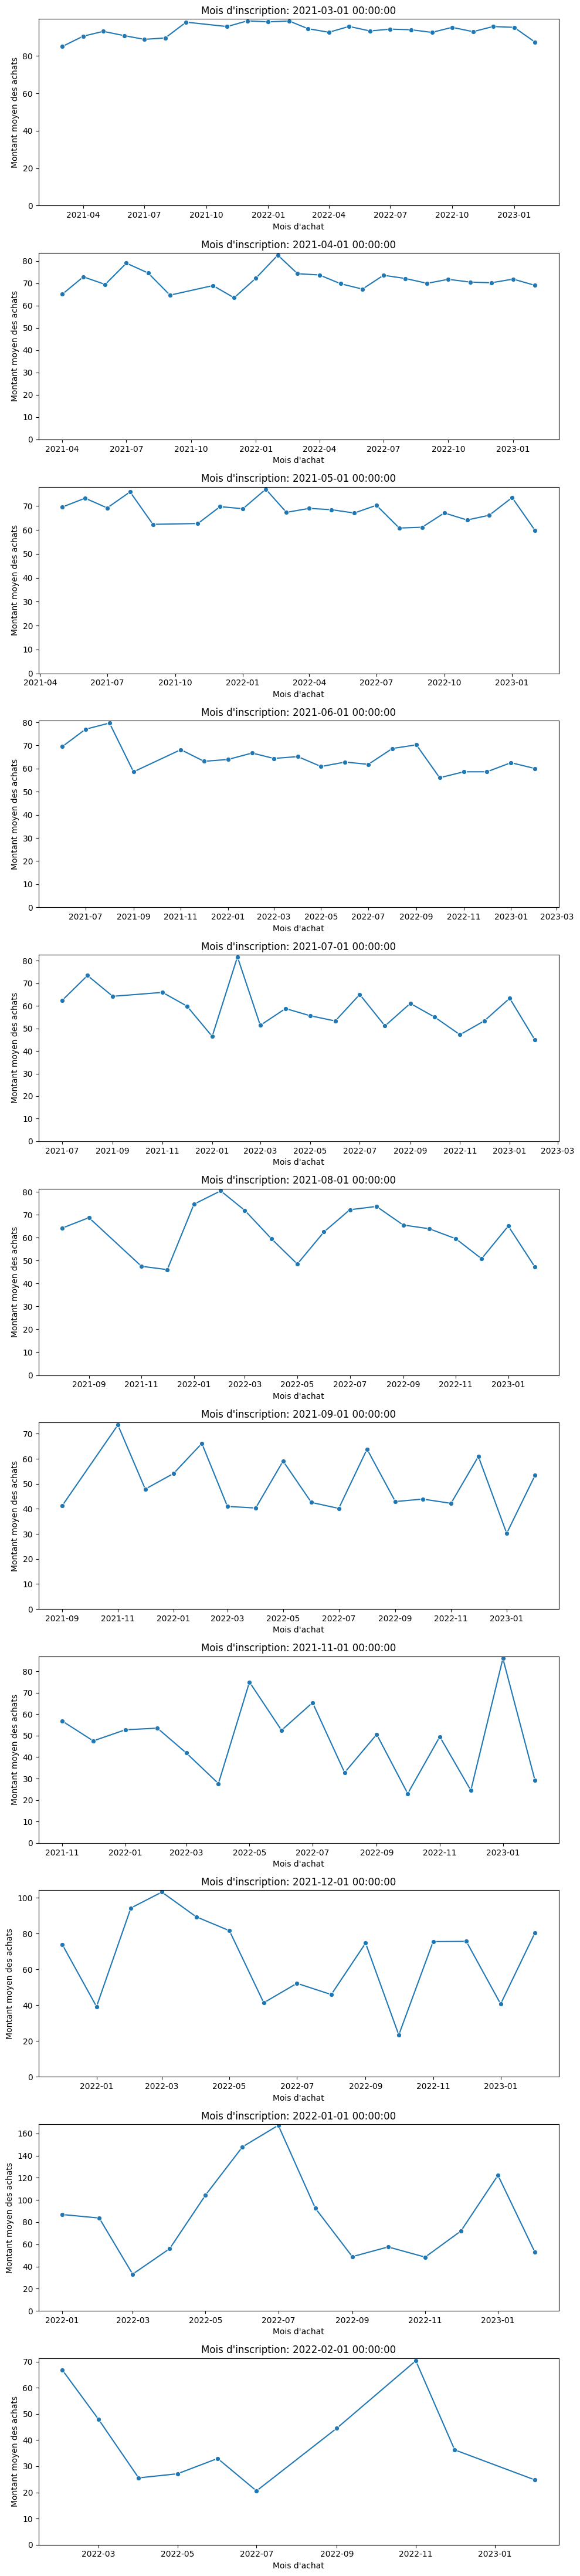

In [ ]:
# Tracer un sous-graphique du suivi des client pour chaque mois d'inscription

fig, axes = plt.subplots(nrows=len(PCT4), ncols=1, figsize=(10, 4 * len(PCT4)))

# Boucle pour creer 1 graph par mois d'inscription
for i, (month, values) in enumerate(PCT4.iterrows()):
    # Forcer l'axe y à commencer à 0
    axes[i].set_ylim(bottom=0)
    # Ajustez la limite supérieure du y-axis
    axes[i].set_ylim(top=values.max() + 1)

    sns.lineplot(data=values, ax=axes[i], marker='o')
    axes[i].set_title(f'Mois d\'inscription: {month}')
    axes[i].set_xlabel('Mois d\'achat')
    axes[i].set_ylabel('Montant moyen des achats')



plt.tight_layout()
plt.show()

Les clients inscrits de mars à juillet 2021, sont très réguliers, avec des montants d'achats stables. A partir de Aout 2021 les montants d'achats sont beaucoup plus fluctuants. Pour les derniers inscrits en Février 2022, le montant des achats est plus bas et fluctuant.

# 5 - Analyse du comportement des clients

In [ ]:
# Discrétisation de la variable age :

PCT_sans_octobre["tranche_age"]=pd.cut(
    PCT_sans_octobre["age"],
    bins=[18, 30,40,50,60,70,80,PCT_sans_octobre["age"].max()], include_lowest=False)
PCT_sans_octobre.head()

<ipython-input-156-450bb56e2463>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT_sans_octobre["tranche_age"]=pd.cut(


id_prod  price  categ client_id sex  birth  age                       date  \
0  0_1518   4.18      0     c_103   f   1986   37 2022-05-20 13:21:29.043970   
1   1_251  15.99      1    c_8534   m   1988   35 2022-02-02 07:55:19.149409   
2  0_1277   7.99      0    c_6714   f   1968   55 2022-06-18 15:44:33.155329   
3   2_209  69.99      2    c_6941   m   2000   23 2021-06-24 04:19:29.835891   
4  0_1509   4.99      0    c_4232   m   1980   43 2023-01-11 08:22:08.194479   

  session_id       mois année mois_inscription tranche_age  
0   s_211425 2022-05-01  2022       2021-03-01    (30, 40]  
1   s_158752 2022-02-01  2022       2021-03-01    (30, 40]  
2   s_225667 2022-06-01  2022       2021-03-01    (50, 60]  
3    s_52962 2021-06-01  2021       2021-03-01    (18, 30]  
4   s_325227 2023-01-01  2023       2021-03-01    (40, 50]

In [ ]:
liste_tranche = PCT_sans_octobre['tranche_age'].unique()
len(liste_tranche)

7

In [ ]:
PCT_sans_octobre.dtypes

id_prod                     object
price                      float64
categ                        int64
client_id                   object
sex                         object
birth                        int64
age                          int64
date                datetime64[ns]
session_id                  object
mois                datetime64[ns]
année                       object
mois_inscription    datetime64[ns]
tranche_age               category
dtype: object

Le type de tranche_age est 'category' et la fonction groupby ne fonctionne pas.
A convertir en en object :

In [ ]:
# Convertion en object

PCT_sans_octobre['tranche_age'] = PCT_sans_octobre['tranche_age'].astype('object')

<ipython-input-159-a3ff21575e51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT_sans_octobre['tranche_age'] = PCT_sans_octobre['tranche_age'].astype('object')


In [ ]:
PCT_sans_octobre.dtypes

id_prod                     object
price                      float64
categ                        int64
client_id                   object
sex                         object
birth                        int64
age                          int64
date                datetime64[ns]
session_id                  object
mois                datetime64[ns]
année                       object
mois_inscription    datetime64[ns]
tranche_age                 object
dtype: object

## 5.1 Lien entre le genre d’un client et les catégories des livres achetés

Corrélation entre 2 variables qualitatives :
 - sunburst chart
 - test du chi-2  / tableau de contingence


In [ ]:
# Distribution de la catégorie entre les genres

PCT_sans_octobre['custom_label'] = 'cat ' + PCT_sans_octobre['categ'].astype(str) # Créer une colonne pour les labels personnalisés
fig = px.sunburst(PCT_sans_octobre,
                  path=['sex', 'custom_label'],
                  color='sex',  # Utiliser la colonne 'sex' comme la colonne color
                  color_discrete_map={'m': 'blue', 'f': 'pink'},
                  width=450, height=450,
                  )

# afficher les %
fig.update_traces(textinfo='label+percent entry', texttemplate='%{label} - %{percentRoot:.1%}')


fig.show()
plt.savefig('/content/drive/My Drive/figure_P6/sun5_1.jpg')

<ipython-input-161-023c51cd1c70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCT_sans_octobre['custom_label'] = 'cat ' + PCT_sans_octobre['categ'].astype(str) # Créer une colonne pour les labels personnalisés


<Figure size 640x480 with 0 Axes>

La répartition homme/femme est très homogène. La différence de répartition entre les catégories est minime.

In [ ]:
# test du chi-2

expected_1, observed_1, stats = pg.chi2_independence(PCT_sans_octobre,'categ','sex')

In [ ]:
expected_1

sex                f              m
categ                              
0      197878.592723  199032.407277
1      112423.733015  113079.266985
2       17604.674263   17707.325737

In [ ]:
observed_1

sex         f       m
categ                
0      197098  199813
1      114087  111416
2       16722   18590

In [ ]:
difference_1 = expected_1 - observed_1
difference_1.head()

sex              f            m
categ                          
0       780.592723  -780.592723
1     -1663.266985  1663.266985
2       882.674263  -882.674263

In [ ]:
difference_1.style.background_gradient(axis=None)

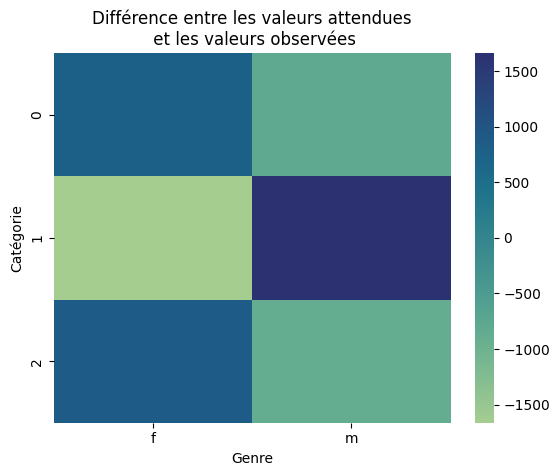

In [ ]:

sns.heatmap(difference_1, cmap="crest")
plt.title('Différence entre les valeurs attendues\n et les valeurs observées')
plt.xlabel('Genre')
plt.ylabel('Catégorie')
plt.savefig('/content/drive/My Drive/figure_P6/heat1.jpg')

le plus d'écart (= le plus de dépendence) est sur la cat 1.

In [ ]:
stats

test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  143.468494  2.0  7.017983e-32  0.014769   
1        cressie-read  0.666667  143.479469  2.0  6.979579e-32  0.014770   
2      log-likelihood  0.000000  143.514299  2.0  6.859083e-32  0.014772   
3       freeman-tukey -0.500000  143.551705  2.0  6.731988e-32  0.014773   
4  mod-log-likelihood -1.000000  143.598799  2.0  6.575322e-32  0.014776   
5              neyman -2.000000  143.722120  2.0  6.182131e-32  0.014782   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0

H0 : les catégories sont indépendantes
H1 : les catégories sont non indépendantes

p-value << 0.05, on rejette HO

On a une association statistiquement significative entre les 2 variables . Le Coefficient V de Cramer est égal à 0.014, la relation est faible.

## 5.2  Lien entre l'âge des clients et le montant total des achats

Graph joined plot : montant total des achats en fonction de l'age

Discrétisation de la variable age : Corrélation entre 1 variable quantitative ( CA_client) et une variable qualitative (tranche d'âge)
- ANOVA :
    - test de normalité
    - test homogéneité des variances
    - choix du test et exécution
  
  
Les 4 clients pro sont écartés de l'étude.

In [ ]:
df_client_CA= PCT_sans_octobre.groupby(['client_id','age','sex','tranche_age'])['price'].sum().reset_index()
df_client_CA = df_client_CA.rename(columns = {'price' : 'CA_client'})
df_client_CA= df_client_CA[~df_client_CA['client_id'].isin(liste_client_pro)]
df_client_CA.head()


client_id  age sex tranche_age  CA_client
0       c_1   68   m    (60, 70]     550.19
1      c_10   67   m    (60, 70]    1353.60
2     c_100   31   m    (30, 40]     254.85
3    c_1000   57   f    (50, 60]    2209.92
4    c_1001   41   m    (40, 50]    1720.08

### 5.2.1 Etude de la corrélation entre l'age et le CA_client

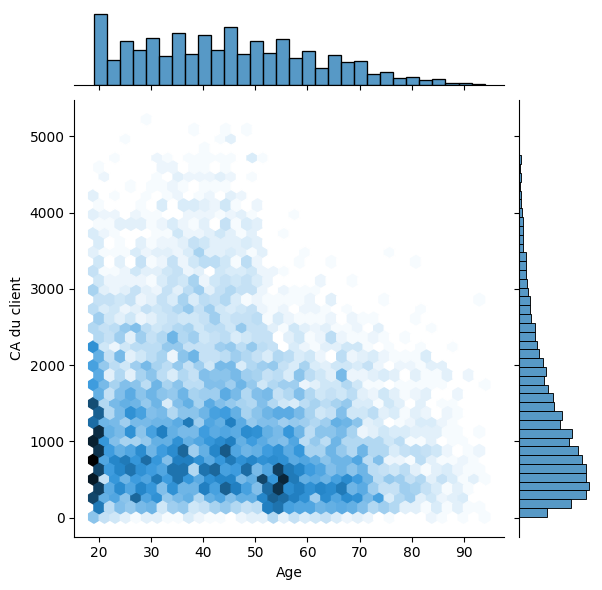

In [ ]:
sns.jointplot(data=df_client_CA, x="age", y="CA_client",  kind="hex")
plt.xlabel('Age')
plt.ylabel('CA du client')
plt.savefig('/content/drive/My Drive/figure_P6/joinplot.jpg')

On observe 2 zones plus dense (=même comportement), autour de 20 ans puis de 55 ans

In [ ]:
# Regression linéaire CA_client en fonction de l'âge

lm=pg.linear_regression(df_client_CA['age'], df_client_CA['CA_client'])
lm.round(2)



names     coef     se      T  pval    r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  1694.92  27.92  60.70   0.0  0.03    0.03   1640.19    1749.65
1        age   -10.11   0.58 -17.32   0.0  0.03    0.03    -11.26      -8.97

La constante (intercept) représente la valeur de la variable dépendante (CA_client) lorsque la variable indépendante (âge) est égale à zéro. Dans ce cas, la constante est de 1671.67. Le p-value très faible suggère que la constante est statistiquement significative.

Le coefficient pour la variable âge est -10.11 Cela signifie que pour chaque unité d'augmentation de l'âge, le CA_client diminue en moyenne de 10.11. Le p-value très faible suggère que la variable âge est statistiquement significative.

 les valeurs r² représentent la proportion de la variance dans la variable dépendante (CA_client) expliquée par le modèle. Dans ce cas, le modèle explique environ 3% de la variance, ce qui indique une faible capacité prédictive

Le modèle suggère qu'il y a une relation significative entre l'âge et le CA_client, mais le modèle n'explique qu'une petite partie de la variance dans le CA_client.

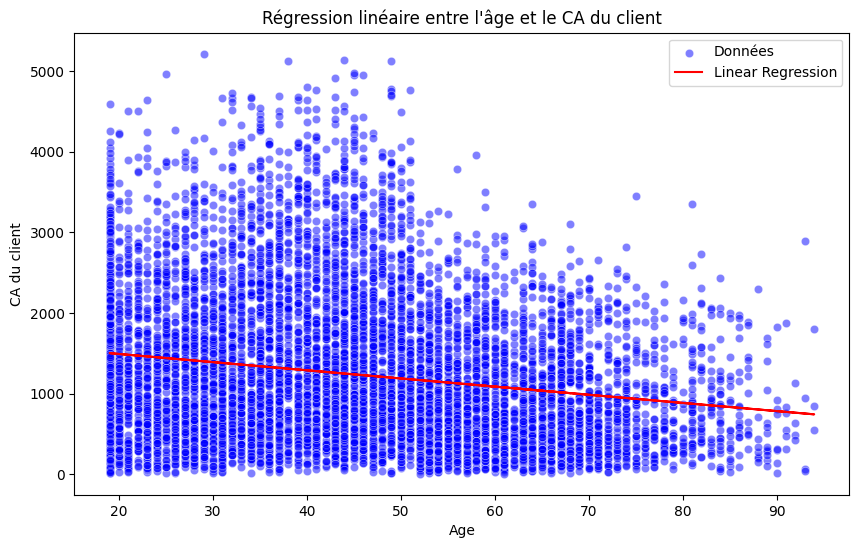

In [ ]:
# Représentation graphique

# Scatter plot des données
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_client_CA, x='age', y='CA_client', color='blue', alpha=0.5, label='Données')

# Ligne de régression
plt.plot(df_client_CA['age'], lm['coef'][0] + lm['coef'][1] * df_client_CA['age'], color='red', label='Linear Regression')

# Ajouter des étiquettes et une légende
plt.title('Régression linéaire entre l\'âge et le CA du client')
plt.xlabel('Age')
plt.ylabel('CA du client')
plt.legend()
plt.savefig('/content/drive/My Drive/figure_P6/RL_age_ca.jpg')

# Afficher le graphique
plt.show()

In [ ]:
# Analyse des résidus

lm.residuals_

array([ -457.09348475,   336.20419004, -1126.58951744, ...,
          30.35583215,  1307.42955569,  -416.86441162])

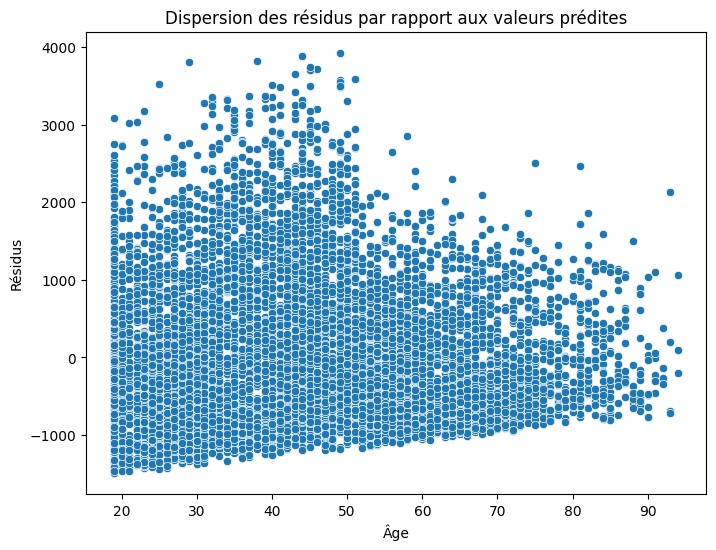

In [ ]:

# Extraction des coefficients
intercept = lm['coef'][0]
slope = lm['coef'][1]

# Calcul des valeurs prédites
predicted_values = intercept + slope * df_client_CA['age']

# Calcul des résidus
residuals = df_client_CA['CA_client'] - predicted_values

# Graphique des résidus
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_client_CA['age'], y=residuals)
plt.title('Dispersion des résidus par rapport aux valeurs prédites')
plt.xlabel('Âge')
plt.ylabel('Résidus')
plt.show()

La corrélation étant faible , l'analyse des résidus n'apporte pas beaucoup à l'étude. On peut cependant dire que les valeurs sont mieux expliquées quand l'âge augmente.

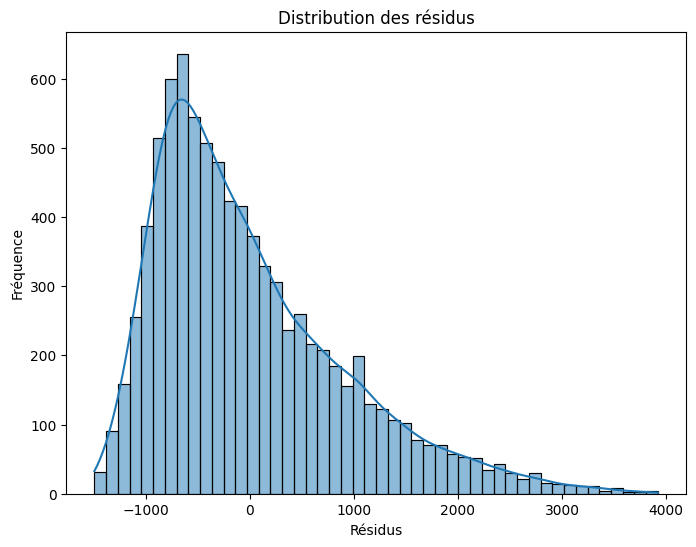

In [ ]:
plt.figure(figsize=(8, 6))

sns.histplot(lm.residuals_, kde=True)
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

On constate un décalage du pic vers les valeurs négatives. les valeurs sont donc plutôt surestimées par la droite de régréssion.

### 5.2.2 Etude de la corrélation après discrétisation de la classe d'âge

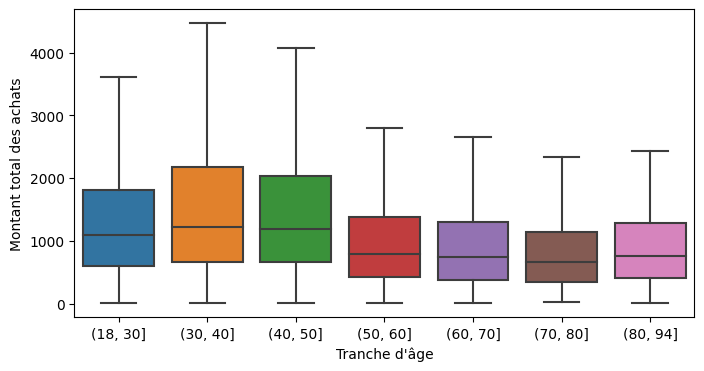

In [ ]:
# Distribution du montant total des achats en fonction de la tranche d'âge

plt.figure(figsize=(8, 4))
sns.boxplot(x='tranche_age', y='CA_client', data=df_client_CA.sort_values(by='tranche_age'), showfliers=False) # showfliers=False - enlève les outliers
plt.ylabel('Montant total des achats')
plt.xlabel('Tranche d\'âge')
plt.savefig('/content/drive/My Drive/figure_P6/box age_montant.jpg')
plt.show()

In [ ]:
for tranche in df_client_CA["tranche_age"].unique():
    subset = df_client_CA.loc[df_client_CA.tranche_age == tranche, :] # Création du sous-échantillon

    print(tranche)
    print("moy:",subset['CA_client'].mean())
    print("med:",subset['CA_client'].median())

(60, 70]
moy: 915.2989395441031
med: 740.27
(30, 40]
moy: 1504.8372080291972
med: 1216.455
(50, 60]
moy: 984.9735729094677
med: 797.63
(40, 50]
moy: 1472.053478753541
med: 1193.57
(80, 94]
moy: 905.0964319248825
med: 768.47
(18, 30]
moy: 1296.883485576923
med: 1094.71
(70, 80]
moy: 841.2715596330276
med: 663.905


La tranche  30-40 semble acheter plus que les autres.
On va vérifier par une ANOVA la significativité des différences observées

**ANOVA**
CA_client / tranche d'âge

In [ ]:
# Test de normalité

pg.normality(df_client_CA['CA_client'], method= 'jarque_bera', alpha=0.05)

W  pval  normal
CA_client  2339.182856   0.0   False

La distribution ne suit pas une loi normale.

In [ ]:
# Test d'homogénéité des variances

pg.homoscedasticity(df_client_CA, method= 'levene', alpha=0.05)

W  pval  equal_var
levene  9888.048928   0.0      False

Il n'y a pas homogénéité des variances.

In [ ]:
# On choisi donc une ANOVA non paramétrique : test de Kruskal-Wallis

result_anova_522 = pg.kruskal(data=df_client_CA, dv='CA_client', between='tranche_age')
print(result_anova_522)

              Source  ddof1           H          p-unc
Kruskal  tranche_age      6  531.353282  1.475866e-111


H : La statistique de test, mesure de la variabilité entre les groupes. Plus la statistique est grande, plus il est probable que les groupes diffèrent les uns des autres.

p-val est très faible, on peut rejeter l'hypothèse nulle (HO = pas de différence entre les tranches).

Il y a des différences significatives entre les groupes en termes de la variable quantitative analysée.

## 5.3 Lien entre l'âge des clients et la fréquence d’achat

### 5.3.1 Etude de la corrélation entre l'âge des clients et la fréquence d’achat (nombre total d'achat)

In [ ]:
PCT_panier = PCT_sans_octobre.groupby(['client_id','session_id', 'date','mois','age','tranche_age'])['price'].sum().reset_index()
PCT_panier=PCT_panier.rename(columns={'price' : 'montant_panier'})
PCT_panier= PCT_panier[~PCT_panier['client_id'].isin(liste_client_pro)]
PCT_panier.head()

client_id session_id                       date       mois  age tranche_age  \
0       c_1   s_114737 2021-11-04 17:28:13.934070 2021-11-01   68    (60, 70]   
1       c_1   s_114737 2021-11-04 18:02:39.561078 2021-11-01   68    (60, 70]   
2       c_1   s_114737 2021-11-04 18:13:43.694570 2021-11-01   68    (60, 70]   
3       c_1   s_114737 2021-11-04 18:37:01.482109 2021-11-01   68    (60, 70]   
4       c_1   s_114737 2021-11-04 18:37:48.745436 2021-11-01   68    (60, 70]   

   montant_panier  
0           54.87  
1            4.00  
2           14.85  
3           14.91  
4            3.99

In [ ]:
PCT_frequence=PCT_panier.groupby(['client_id','age','tranche_age'])['montant_panier'].count().reset_index()
PCT_frequence=PCT_frequence.rename(columns={'montant_panier' : 'frequence'})
PCT_frequence.head()

client_id  age tranche_age  frequence
0       c_1   68    (60, 70]         38
1      c_10   67    (60, 70]         58
2     c_100   31    (30, 40]          8
3    c_1000   57    (50, 60]        122
4    c_1001   41    (40, 50]         96

In [ ]:
# Regression linéaire CA_client en fonction de l'âge

lreg=pg.linear_regression(PCT_frequence['age'], PCT_frequence['frequence'])
lreg.round(3)


names    coef     se       T   pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  65.581  2.001  32.775  0.000  0.001   0.001    61.658     69.503
1        age   0.128  0.042   3.048  0.002  0.001   0.001     0.046      0.210

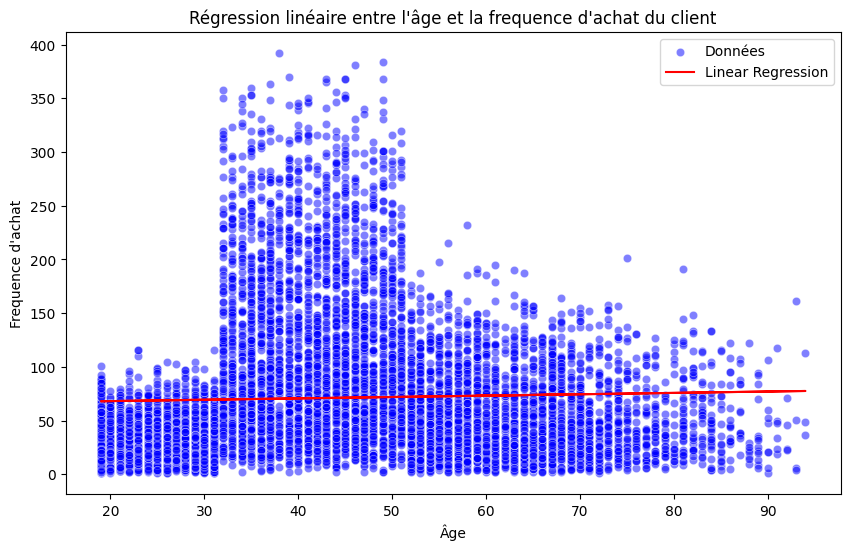

In [ ]:
# Représentation graphique

# Scatter plot des données
plt.figure(figsize=(10, 6))
sns.scatterplot(data=PCT_frequence, x='age', y='frequence', color='blue', alpha=0.5, label='Données')

# Ligne de régression
plt.plot(PCT_frequence['age'], lreg['coef'][0] + lreg['coef'][1] * PCT_frequence['age'], color='red', label='Linear Regression')

# Ajouter des étiquettes et une légende
plt.title('Régression linéaire entre l\'âge et la frequence d\'achat du client')
plt.xlabel('Âge')
plt.ylabel('Frequence d\'achat')
plt.legend()

plt.savefig('/content/drive/My Drive/figure_P6/RL_age_freq.jpg')

# Afficher le graphique
plt.show()

P val < 0.05  /  r² = 0.028

 Le modèle suggère qu'il y a une relation significative entre l'âge et la fréquence d'achat, mais le modèle n'explique qu'une petite partie (2.8 %) de la variance dans la fréquence d'achat.

### 5.3.2 Etude de la corrélation après discrétisation de la classe d'âge

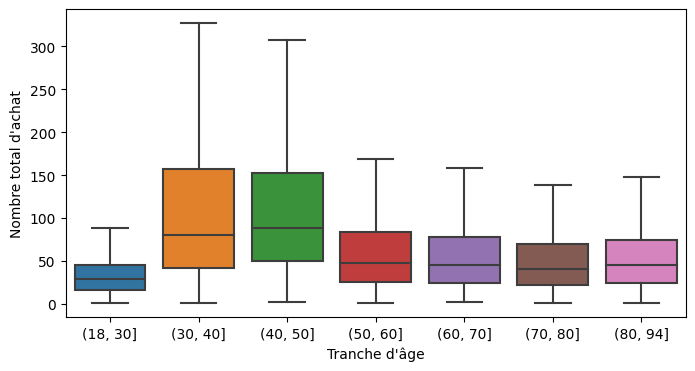

In [ ]:
# Distribution de la fréquence d'achats en fonction de la tranche d'âge

plt.figure(figsize=(8, 4))
sns.boxplot(x='tranche_age', y='frequence', data=PCT_frequence.sort_values(by='tranche_age'), showfliers=False) # showfliers=False - enlève les outliers et notemment les 4 clients pro
plt.ylabel('Nombre total d\'achat')
plt.xlabel('Tranche d\'âge')
plt.savefig('/content/drive/My Drive/figure_P6/box age_freq.jpg')
plt.show()

In [ ]:
for tranche in PCT_frequence["tranche_age"].unique():
    subset = PCT_frequence.loc[PCT_frequence.tranche_age == tranche, :] # Création du sous-échantillon

    print(tranche)
    print("moy:",subset['frequence'].mean())
    print("med:",subset['frequence'].median())

(60, 70]
moy: 54.194251734390484
med: 45.0
(30, 40]
moy: 106.38746958637469
med: 80.0
(50, 60]
moy: 60.56599861782999
med: 48.0
(40, 50]
moy: 110.46458923512748
med: 88.0
(80, 94]
moy: 53.59154929577465
med: 46.0
(18, 30]
moy: 32.23173076923077
med: 29.0
(70, 80]
moy: 50.40596330275229
med: 41.0


Visuellement on observe des différences de comportement selon la classe d'age avec notemment :
- une fréquence plus basse dans la tranche 19-30
- un maximum pour les 30-50

On va évaluer la significativité des différences par une ANOVA



In [ ]:
# Vérification des conditions de test
  # Test de normalité

pg.normality(PCT_frequence['frequence'], method= 'jarque_bera', alpha=0.05)

W  pval  normal
frequence  7921.185042   0.0   False

La distribution ne suit pas une loi Normale.

In [ ]:
  # Test d'homogénéité des variances

pg.homoscedasticity(PCT_frequence, method= 'levene', alpha=0.05)

W  pval  equal_var
levene  2891.66224   0.0      False

Il n'y a pas homogénaité des variances.

In [ ]:
# ANOVA non paramétrique : test de Kruskal-Wallis

result_anova_532 = pg.kruskal(data=PCT_frequence, dv='frequence', between='tranche_age')

# Affichez les résultats
print(result_anova_532)

              Source  ddof1            H  p-unc
Kruskal  tranche_age      6  2072.401658    0.0


Pval <<0.05 . Les différence entre les tranches d'âge sont significatives

### 5.3.3 Etude de la corrélation entre l'âge des clients et la fréquence d’achat (délai entre 2 achats)

In [ ]:
PCT_panier.head()

client_id session_id                       date       mois  age tranche_age  \
0       c_1   s_114737 2021-11-04 17:28:13.934070 2021-11-01   68    (60, 70]   
1       c_1   s_114737 2021-11-04 18:02:39.561078 2021-11-01   68    (60, 70]   
2       c_1   s_114737 2021-11-04 18:13:43.694570 2021-11-01   68    (60, 70]   
3       c_1   s_114737 2021-11-04 18:37:01.482109 2021-11-01   68    (60, 70]   
4       c_1   s_114737 2021-11-04 18:37:48.745436 2021-11-01   68    (60, 70]   

   montant_panier  
0           54.87  
1            4.00  
2           14.85  
3           14.91  
4            3.99

In [ ]:
PCT_panier.dtypes

client_id                         object
session_id                        object
date                      datetime64[ns]
mois                      datetime64[ns]
age                                int64
tranche_age       interval[int64, right]
montant_panier                   float64
dtype: object

In [ ]:
# création du df avec les variables année_jour_mois (a_m_j), age tranch_age montant_panier

PCT_panier['a_m_j'] = PCT_panier['date'].dt.strftime('%Y-%m-%d') # Création de la variable mois (annee_mois_jour a_m_j)
PCT_délai = PCT_panier.groupby(['client_id', 'a_m_j', 'age', 'tranche_age'])['montant_panier'].sum().reset_index()
PCT_délai.head()

client_id       a_m_j  age tranche_age  montant_panier
0       c_1  2021-06-11   68    (60, 70]           19.53
1       c_1  2021-07-21   68    (60, 70]           11.99
2       c_1  2021-07-25   68    (60, 70]           12.30
3       c_1  2021-07-26   68    (60, 70]           18.94
4       c_1  2021-07-27   68    (60, 70]           11.99

In [ ]:
PCT_délai.dtypes

client_id                         object
a_m_j                             object
age                                int64
tranche_age       interval[int64, right]
montant_panier                   float64
dtype: object

In [ ]:
# calcul du délai entre 2 achats par clients

PCT_délai['a_m_j'] = pd.to_datetime(PCT_délai['a_m_j']) #converti au format date
PCT_délai.sort_values(by=['client_id', 'a_m_j'], inplace=True) #trier par client et par date
PCT_délai['delai_entre_dates'] = PCT_délai.groupby('client_id')['a_m_j'].diff() # calcul de la différence entre 2 dates par client
PCT_délai.head()

client_id      a_m_j  age tranche_age  montant_panier delai_entre_dates
0       c_1 2021-06-11   68    (60, 70]           19.53               NaT
1       c_1 2021-07-21   68    (60, 70]           11.99           40 days
2       c_1 2021-07-25   68    (60, 70]           12.30            4 days
3       c_1 2021-07-26   68    (60, 70]           18.94            1 days
4       c_1 2021-07-27   68    (60, 70]           11.99            1 days

In [ ]:
# calcul du délai moyen entre 2 achats par clients

PCT_délaimoyen = PCT_délai.groupby(['client_id','age','tranche_age'])['delai_entre_dates'].mean().reset_index() #donne un résultat jour heure seconde
PCT_délaimoyen['delai_entre_dates'] = PCT_délaimoyen['delai_entre_dates'].dt.total_seconds() #converti en secondes
PCT_delaimoyen_jour = PCT_délaimoyen.groupby(['client_id','age','tranche_age'])['delai_entre_dates'].mean().div(86400).round().reset_index() #ramène en jour
PCT_delaimoyen_jour= PCT_delaimoyen_jour.rename(columns={'delai_entre_dates':'délai_moyen_entre_achat'})
PCT_delaimoyen_jour.head()

client_id  age tranche_age  délai_moyen_entre_achat
0       c_1   68    (60, 70]                     19.0
1      c_10   67    (60, 70]                     21.0
2     c_100   31    (30, 40]                    130.0
3    c_1000   57    (50, 60]                      8.0
4    c_1001   41    (40, 50]                     18.0

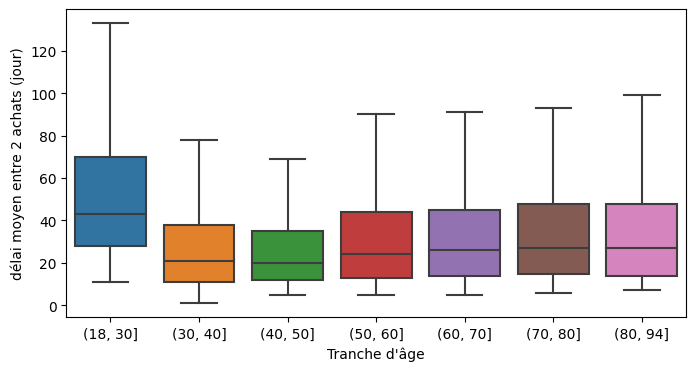

In [ ]:
# Distribution du délai entre 2 achats en fonction de la tranche d'âge

plt.figure(figsize=(8, 4))
sns.boxplot(x='tranche_age', y='délai_moyen_entre_achat', data=PCT_delaimoyen_jour.sort_values(by='tranche_age'), showfliers=False) # showfliers=False - enlève les outliers et notemment les 4 clients pro
plt.ylabel('délai moyen entre 2 achats (jour)')
plt.xlabel('Tranche d\'âge')
plt.savefig('/content/drive/My Drive/figure_P6/box age_délai2.jpg')
plt.show()

In [ ]:
for tranche in PCT_delaimoyen_jour["tranche_age"].unique():
    subset = PCT_delaimoyen_jour.loc[PCT_delaimoyen_jour.tranche_age == tranche, :] # Création du sous-échantillon

    print(tranche)
    print("moy:",subset['délai_moyen_entre_achat'].mean())
    print("med:",subset['délai_moyen_entre_achat'].median())

(60, 70]
moy: 37.184890656063615
med: 26.0
(30, 40]
moy: 31.689065363469762
med: 21.0
(50, 60]
moy: 35.75017301038062
med: 24.0
(40, 50]
moy: 28.03688989784336
med: 20.0
(80, 94]
moy: 38.193396226415096
med: 27.0
(18, 30]
moy: 58.9612027158099
med: 43.0
(70, 80]
moy: 39.20919540229885
med: 27.0


In [ ]:
# Vérification des conditions de test
  # Test de normalité

pg.normality(PCT_delaimoyen_jour['délai_moyen_entre_achat'], method= 'jarque_bera', alpha=0.05)

W  pval  normal
délai_moyen_entre_achat  411875.354515   0.0   False

In [ ]:
  # Test d'homogénéité des variances

pg.homoscedasticity(PCT_frequence, method= 'levene', alpha=0.05)

W  pval  equal_var
levene  2891.66224   0.0      False

In [ ]:
# ANOVA non paramétrique : test de Kruskal-Wallis

result_anova_533 = pg.kruskal(data=PCT_frequence, dv='frequence', between='tranche_age')

# Affichez les résultats
print(result_anova_533)

              Source  ddof1            H  p-unc
Kruskal  tranche_age      6  2072.401658    0.0


## 5.4 Lien entre l'âge des clients et la taille du panier moyen



### 5.4.1 Etude de la corrélation l'âge des clients et la taille du panier moyen

In [ ]:
PCT_panier_moyen = PCT_panier.groupby(['client_id','age','tranche_age'])['montant_panier'].mean().reset_index()
PCT_panier_moyen.rename(columns={'montant_panier': 'panier_moyen'}, inplace=True)
PCT_panier_moyen[('panier_moyen')]= round(PCT_panier_moyen[('panier_moyen')],2)
PCT_panier_moyen.head()

client_id  age tranche_age  panier_moyen
0       c_1   68    (60, 70]         14.48
1      c_10   67    (60, 70]         23.34
2     c_100   31    (30, 40]         31.86
3    c_1000   57    (50, 60]         18.11
4    c_1001   41    (40, 50]         17.92

In [ ]:
panier_moyen = PCT_panier_moyen['panier_moyen'].mean()
print(round(panier_moyen,2))

22.09


In [ ]:
# Regression linéaire panier moyen en fonction de l'âge

lreg2=pg.linear_regression(PCT_panier_moyen['age'], PCT_panier_moyen['panier_moyen'])
lreg2.round(3)

names    coef     se        T  pval     r2  adj_r2  CI[2.5%]  CI[97.5%]
0  Intercept  42.399  0.396  106.995   0.0  0.259   0.259    41.622     43.176
1        age  -0.454  0.008  -54.801   0.0  0.259   0.259    -0.470     -0.438

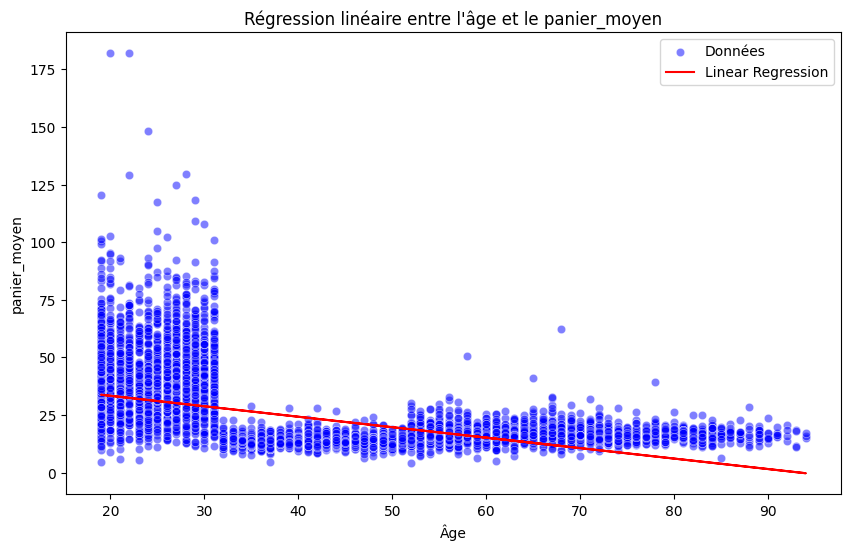

In [ ]:
# Représentation graphique

# Scatter plot des données
plt.figure(figsize=(10, 6))
sns.scatterplot(data=PCT_panier_moyen, x='age', y='panier_moyen', color='blue', alpha=0.5, label='Données')

# Ligne de régression
plt.plot(PCT_panier_moyen['age'], lreg2['coef'][0] + lreg2['coef'][1] * PCT_panier_moyen['age'], color='red', label='Linear Regression')

# Ajouter des étiquettes et une légende
plt.title('Régression linéaire entre l\'âge et le panier_moyen')
plt.xlabel('Âge')
plt.ylabel('panier_moyen')
plt.legend()

plt.savefig('/content/drive/My Drive/figure_P6/RL_age_panier.jpg')

# Afficher le graphique
plt.show()

p val faible suggère une association entre les variables âge et panier moyen.s r² explique  34% des valeurs.

### 5.4.2 Etude de la corrélation après discrétisation de la classe d'âge

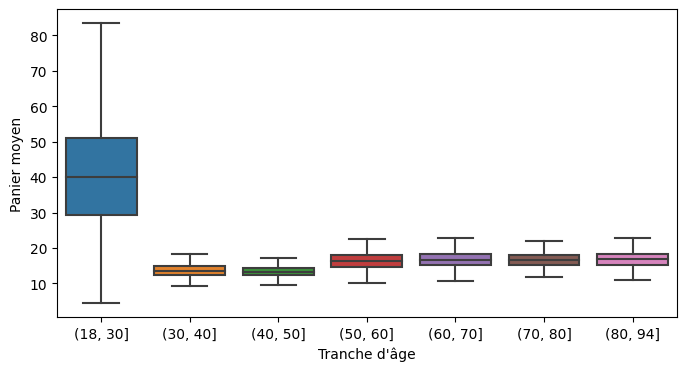

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='tranche_age', y='panier_moyen', data=PCT_panier_moyen.sort_values(by='tranche_age'), showfliers=False) # showfliers=False - enlève les outliers et notemment les 4 clients pro
plt.ylabel('Panier moyen')
plt.xlabel('Tranche d\'âge')
plt.savefig('/content/drive/My Drive/figure_P6/box age_panier.jpg')
plt.show()

In [ ]:
for tranche in PCT_panier_moyen["tranche_age"].unique():
    subset = PCT_panier_moyen.loc[PCT_panier_moyen.tranche_age == tranche, :] # Création du sous-échantillon

    print(tranche)
    print("moy:",subset['panier_moyen'].mean())
    print("med:",subset['panier_moyen'].median())



(60, 70]
moy: 16.872933597621408
med: 16.53
(30, 40]
moy: 16.67299878345499
med: 13.445
(50, 60]
moy: 16.44230131306151
med: 16.3
(40, 50]
moy: 13.458237960339943
med: 13.25
(80, 94]
moy: 16.679389671361502
med: 16.78
(18, 30]
moy: 41.81674519230769
med: 39.965
(70, 80]
moy: 16.725160550458718
med: 16.51


Visuellement on observe des différences de comportement selon la classe d'age avec notemment un panier moyen beaucoup plus important  dans la tranche 19-30,
suivi par les 30-50. On note peu de variations de 50 à 80+,

On va évaluer la significativité de ces différences par une ANOVA

In [ ]:
# Vérification des conditions de test
  # Test de normalité

pg.normality(PCT_panier_moyen['panier_moyen'], method= 'jarque_bera', alpha=0.05)

W  pval  normal
panier_moyen  33570.191559   0.0   False

In [ ]:
  # Test d'homogénéité des variances
pg.homoscedasticity(PCT_panier_moyen, method= 'levene', alpha=0.05)

W           pval  equal_var
levene  874.17685  1.933739e-187      False

In [ ]:
# ANOVA non paramétrique : test de Kruskal-Wallis

result_anova_542 = pg.kruskal(data=PCT_panier_moyen, dv='panier_moyen', between='tranche_age')
print(result_anova_542)

              Source  ddof1            H  p-unc
Kruskal  tranche_age      6  5109.699344    0.0


Différences entre les tranches d'age sigificatives

## 5.5 Lien entre l'âge des clients et la catégorie des livres achetés



In [ ]:
PCT_sans_octobre.head()

id_prod  price  categ client_id sex  birth  age                       date  \
0  0_1518   4.18      0     c_103   f   1986   37 2022-05-20 13:21:29.043970   
1   1_251  15.99      1    c_8534   m   1988   35 2022-02-02 07:55:19.149409   
2  0_1277   7.99      0    c_6714   f   1968   55 2022-06-18 15:44:33.155329   
3   2_209  69.99      2    c_6941   m   2000   23 2021-06-24 04:19:29.835891   
4  0_1509   4.99      0    c_4232   m   1980   43 2023-01-11 08:22:08.194479   

  session_id       mois année mois_inscription tranche_age custom_label  
0   s_211425 2022-05-01  2022       2021-03-01    (30, 40]        cat 0  
1   s_158752 2022-02-01  2022       2021-03-01    (30, 40]        cat 1  
2   s_225667 2022-06-01  2022       2021-03-01    (50, 60]        cat 0  
3    s_52962 2021-06-01  2021       2021-03-01    (18, 30]        cat 2  
4   s_325227 2023-01-01  2023       2021-03-01    (40, 50]        cat 0

Text(0, 0.5, 'age')

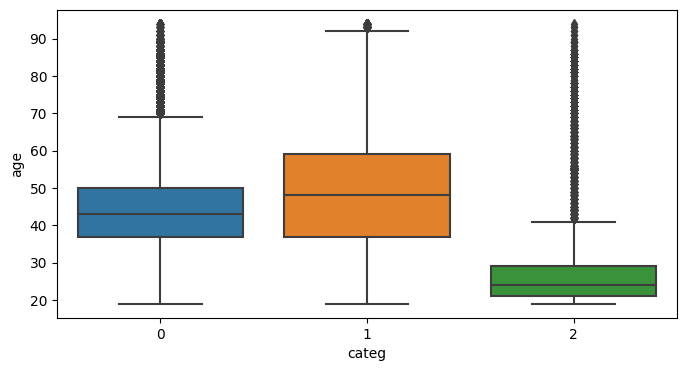

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='categ', y='age', data=PCT_sans_octobre)
plt.ylabel('age')


In [ ]:
for categ in PCT_sans_octobre["categ"].unique():
    subset = PCT_sans_octobre.loc[PCT_sans_octobre.categ == categ, :] # Création du sous-échantillon

    print(categ)
    print("moy:",subset['age'].mean())
    print("med:",subset['age'].median())

0
moy: 44.902930379858454
med: 43.0
1
moy: 48.65036385325251
med: 48.0
2
moy: 26.941408019936567
med: 24.0


L'âge médian des clients qui achètent des produits catégorie 0 est 44,9 ans

L'âge médian des clients qui achètent des produits catégorie 1 est 48 ans

L'âge médian des clients qui achètent des produits catégorie 0 est **24** ans

In [ ]:
# distribution de la catégorie entre les tranches d'age

fig = px.sunburst(PCT_sans_octobre, path=['custom_label','tranche_age'],  width=650, height=650,title="Répartition des tranches d\'age par catégorie")

fig.show()

La répartition au sein de chaque catégorie est très différente :

Catégorie 0: large majorité des tranches 30-50 / 40-50
Catégorie 1 : la répartition est plus homogène aev une majorité pour les 30-60
Catégorie 2: On trouve essentiellment les 19-30 !
On va évaluer l'association de la variable catégorie et tranche d'âge par un test du chi_2.

In [ ]:

fig = px.sunburst(PCT_sans_octobre, path=['tranche_age','custom_label'],  width=650, height=650,title="Répartition des tranches d\'age par catégorie")

fig.show()

Les plus gros volumes d'achat :  30-50. essentiellment 0 et 1 (avec un peu de 2 en 30-40)
Puis 50-60 que 1 et 0
18-30 : 2 en plus greande quntité puis 1 et 0
60 et + : 1 et 0 en quantité décroissante

On va évaluer l'association de la variable catégorie et tranche d'âge par un test du chi_2.

In [ ]:
# Test du chi2

expected_2, observed_2, stats = pg.chi2_independence(PCT_sans_octobre,'categ','tranche_age')

In [ ]:
expected_2

tranche_age      (18, 30]       (30, 40]       (40, 50]      (50, 60]  \
categ                                                                   
0            43528.740314  105545.669186  132424.358566  62263.140346   
1            24730.636155   59965.244194   75236.237166  35374.491857   
2             3872.623530    9390.086620   11781.404269   5539.367798   

tranche_age      (60, 70]      (70, 80]     (80, 94]  
categ                                                 
0            32998.372122  13262.229328  6888.490139  
1            18747.860121   7534.869278  3913.661228  
2             2935.767757   1179.901394   612.848633

In [ ]:
observed_2

tranche_age  (18, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  (70, 80]  \
categ                                                                     
0               14729    129089    165813     49649     23499      9338   
1               27546     42925     52871     52533     30657     12471   
2               29857      2887       758       995       526       168   

tranche_age  (80, 94]  
categ                  
0                4794  
1                6500  
2                 121

In [ ]:
difference2 = expected_2-observed_2

difference2.head()

tranche_age      (18, 30]      (30, 40]      (40, 50]      (50, 60]  \
categ                                                                 
0            28799.740314 -23543.330814 -33388.641434  12614.140346   
1            -2815.363845  17040.244194  22365.237166 -17158.508143   
2           -25984.376470   6503.086620  11023.404269   4544.367798   

tranche_age      (60, 70]     (70, 80]     (80, 94]  
categ                                                
0             9499.372122  3924.229328  2094.490139  
1           -11909.139879 -4936.130722 -2586.338772  
2             2409.767757  1011.901394   491.848633

In [ ]:
difference2.style.background_gradient(axis=0)

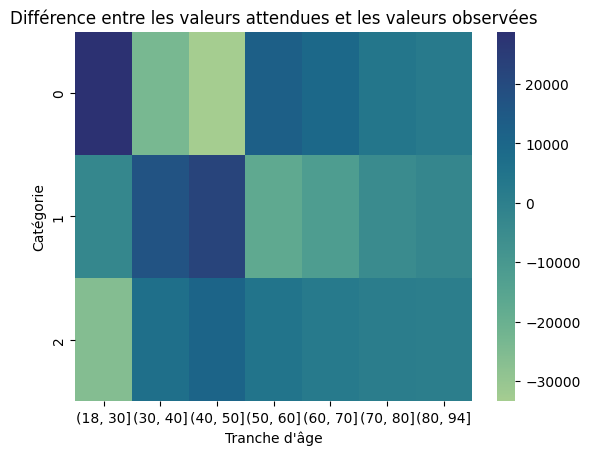

In [ ]:
sns.heatmap(difference2, cmap="crest")
plt.title('Différence entre les valeurs attendues et les valeurs observées')
plt.ylabel('Catégorie')
plt.xlabel('Tranche d\'âge')
plt.savefig('/content/drive/My Drive/figure_P6/heat2.jpg')

In [ ]:
stats

test    lambda           chi2   dof  pval    cramer  power
0             pearson  1.000000  268590.260982  12.0   0.0  0.451864    1.0
1        cressie-read  0.666667  223274.972065  12.0   0.0  0.411986    1.0
2      log-likelihood  0.000000  181690.245023  12.0   0.0  0.371645    1.0
3       freeman-tukey -0.500000  177578.331505  12.0   0.0  0.367416    1.0
4  mod-log-likelihood -1.000000  193722.249348  12.0   0.0  0.383753    1.0
5              neyman -2.000000  344127.547141  12.0   0.0  0.511472    1.0

p_val << 0.5 / cramer 0.45 , il y a une association significative entre les catégories et les tranches d'âge. Le V de cramer indique une association modérée à forte.